#### Credits and refrences: <br>
I have learned these techniques and implemented in this competitions from following kernels: <br>
1. [Disaster Tweets: Understanding Data & Basic model](https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model#3.-Resampling-the-training-data) <br>

Thanks to authors of the above kernels :)

<a id='Target Visualization'></a>
# <font color='#3d3d5c'> Part one: Target Visualization</font> 
<br>

# 1. Importing necessary modules.
<br>

In [82]:
import os
import re
import warnings
from string import punctuation

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

import numpy as np

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# import os

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# from nltk.corpus import stopwords
# from string import punctuation

# import re

# import bokeh.plotting as bp
# from bokeh.models import HoverTool, BoxSelectTool
# from bokeh.models import ColumnDataSource
# from bokeh.plotting import figure, show, output_notebook, reset_output
# from bokeh.palettes import d3
# import bokeh.models as bmo
# from bokeh.io import save, output_file

# import warnings
# warnings.filterwarnings('ignore')


unable to import 'smart_open.gcs', disabling that module


## 1.1 warning

In [2]:
warnings.filterwarnings('ignore')

## 1.2 nltk

* When you download nltk data in project dirctory, it is necessary to add path 

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
nltk.data.path.append("/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/nltk_data")

## 1.3 matplolib

In [5]:
%matplotlib inline

## 1.4 pandas

* prevent chained_assignment

In [6]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

<hr>

# 2. Importing dataframes.
<br>

In [7]:
raw_train = pd.read_csv('./data/train.csv')
raw_test = pd.read_csv('./data/test.csv')

# train_df = pd.read_csv('./data/train.csv')
# test_df = pd.read_csv('./data/test.csv')

In [8]:
raw_train.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
raw_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<hr>

# 3. Resampling the training data.

In [10]:
train_disaster = raw_train[raw_train['target'] == 1]
train_non_disaster = raw_train[raw_train['target'] == 0]

length_disaster = len(train_disaster)
lengtH_non_disaster = len(train_non_disaster)

train_disaster = train_disaster.sample(length_disaster)
train_non_disaster = train_non_disaster.sample(lengtH_non_disaster)

train_eda = train_disaster.append(train_non_disaster).reset_index()

train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In #India 119000 people have taken shelter in ...       1  
2     MH370: Aircraft debris found on La Reunion is ...       1  
3     UAE cool to Mideast heat-wave; rain watch late...       1  
4     Photo: mothernaturenetwork: What is thundersno...       1  
...                                                 ...     ...  
7608  I'm on 2 blood pressure meds and it's still pr...       0  
7609  HAPPY 24 TWISTER!!! Thank you for all the laug...       0  
7610                Status: last seen buying body bags.       0  
7611  I'm only experienced with injuries below the w...       0  
7612  LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...       0  

[7613 rows x 6 columns]

# 4. Text processing.

* Tokenization
* Stemming or Lemmatization

**before tokenization**

In [11]:
puncts=['☹', 'Ź', 'Ż', 'ἰ', 'ή', 'Š', '＞', 'ξ','ฉ', 'ั', 'น', 'จ', 'ะ', 'ท', 'ำ', 'ใ', 'ห', '้', 'ด', 'ี', '่', 'ส', 'ุ', 'Π', 'प', 'ऊ', 'Ö', 'خ', 'ب', 'ஜ', 'ோ', 'ட', '「', 'ẽ', '½', '△', 'É', 'ķ', 'ï', '¿', 'ł', '북', '한', '¼', '∆', '≥', '⇒', '¬', '∨', 'č', 'š', '∫', 'ḥ', 'ā', 'ī', 'Ñ', 'à', '▾', 'Ω', '＾', 'ý', 'µ', '?', '!', '.', ',', '"', '#', '$', '%', '\\', "'", '(', ')', '*', '+', '-', '/', ':', ';', '<', '=', '>', '@', '[', ']', '^', '_', '`', '{', '|', '}', '~', '“', '”', '’', 'é', 'á', '′', '…', 'ɾ', '̃', 'ɖ', 'ö', '–', '‘', 'ऋ', 'ॠ', 'ऌ', 'ॡ', 'ò', 'è', 'ù', 'â', 'ğ', 'म', 'ि', 'ल', 'ग', 'ई', 'क', 'े', 'ज', 'ो', 'ठ', 'ं', 'ड', 'Ž', 'ž', 'ó', '®', 'ê', 'ạ', 'ệ', '°', 'ص', 'و', 'ر', 'ü', '²', '₹', 'ú', '√', 'α', '→', 'ū', '—', '£', 'ä', '️', 'ø', '´', '×', 'í', 'ō', 'π', '÷', 'ʿ', '€', 'ñ', 'ç', 'へ', 'の', 'と', 'も', '↑', '∞', 'ʻ', '℅''ι', '•', 'ì', '−', 'л', 'я', 'д', 'ل', 'ك', 'م', 'ق', 'ا', '∈', '∩', '⊆', 'ã', 'अ', 'न', 'ु', 'स', '्', 'व', 'ा', 'र', 'त', '§', '℃', 'θ', '±', '≤', 'उ', 'द', 'य', 'ब', 'ट', '͡', '͜', 'ʖ', '⁴', '™', 'ć', 'ô', 'с', 'п', 'и', 'б', 'о', 'г', '≠', '∂', 'आ', 'ह', 'भ', 'ी', '³', 'च', '...', '⌚', '⟨', '⟩', '∖', '˂', 'ⁿ', '⅔', 'న', 'ీ', 'క', 'ె', 'ం', 'ద', 'ు', 'ా', 'గ', 'ర', 'ి', 'చ', 'র', 'ড়', 'ঢ়', 'સ', 'ં', 'ઘ', 'ર', 'ા', 'જ', '્', 'ય', 'ε', 'ν', 'τ', 'σ', 'ş', 'ś', 'س', 'ت', 'ط', 'ي', 'ع', 'ة', 'د', 'Å', '☺', 'ℇ', '❤', '♨', '✌', 'ﬁ', 'て', '„', 'Ā', 'ត', 'ើ', 'ប', 'ង', '្', 'អ', 'ូ', 'ន', 'ម', 'ា', 'ធ', 'យ', 'វ', 'ី', 'ខ', 'ល', 'ះ', 'ដ', 'រ', 'ក', 'ឃ', 'ញ', 'ឯ', 'ស', 'ំ', 'ព', 'ិ', 'ៃ', 'ទ', 'គ', '¢', 'つ', 'や', 'ค', 'ณ', 'ก', 'ล', 'ง', 'อ', 'ไ', 'ร', 'į', 'ی', 'ю', 'ʌ', 'ʊ', 'י', 'ה', 'ו', 'ד', 'ת', 'ᠠ', 'ᡳ', 'ᠰ', 'ᠨ', 'ᡤ', 'ᡠ', 'ᡵ', 'ṭ', 'ế', 'ध', 'ड़', 'ß', '¸', 'ч',  'ễ', 'ộ', 'फ', 'μ', '⧼', '⧽', 'ম', 'হ', 'া', 'ব', 'ি', 'শ', '্', 'প', 'ত', 'ন', 'য়', 'স', 'চ', 'ছ', 'ে', 'ষ', 'য', '়', 'ট', 'উ', 'থ', 'ক', 'ῥ', 'ζ', 'ὤ', 'Ü', 'Δ', '내', '제', 'ʃ', 'ɸ', 'ợ', 'ĺ', 'º', 'ष', '♭', '़', '✅', '✓', 'ě', '∘', '¨', '″', 'İ', '⃗', '̂', 'æ', 'ɔ', '∑', '¾', 'Я', 'х', 'О', 'з', 'ف', 'ن', 'ḵ', 'Č', 'П', 'ь', 'В', 'Φ', 'ỵ', 'ɦ', 'ʏ', 'ɨ', 'ɛ', 'ʀ', 'ċ', 'օ', 'ʍ', 'ռ', 'ք', 'ʋ', '兰', 'ϵ', 'δ', 'Ľ', 'ɒ', 'î', 'Ἀ', 'χ', 'ῆ', 'ύ', 'ኤ', 'ል', 'ሮ', 'ኢ', 'የ', 'ኝ', 'ን', 'አ', 'ሁ', '≅', 'ϕ', '‑', 'ả', '￼', 'ֿ', 'か', 'く', 'れ', 'ő', '－', 'ș', 'ן', 'Γ', '∪', 'φ', 'ψ', '⊨', 'β', '∠', 'Ó', '«', '»', 'Í', 'க', 'வ', 'ா', 'ம', '≈', '⁰', '⁷', 'ấ', 'ũ', '눈', '치', 'ụ', 'å', '،', '＝', '（', '）', 'ə', 'ਨ', 'ਾ', 'ਮ', 'ੁ', '︠', '︡', 'ɑ', 'ː', 'λ', '∧', '∀', 'Ō', 'ㅜ', 'Ο', 'ς', 'ο', 'η', 'Σ', 'ण']
odd_chars=[ '大','能', '化', '生', '水', '谷', '精', '微', 'ル', 'ー', 'ジ', 'ュ', '支', '那', '¹', 'マ', 'リ', '仲', '直', 'り', 'し', 'た', '主', '席', '血', '⅓', '漢', '髪', '金', '茶', '訓', '読', '黒', 'ř', 'あ', 'わ', 'る', '胡', '南', '수', '능', '广', '电', '总', 'ί', '서', '로', '가', '를', '행', '복', '하', '게', '기', '乡', '故', '爾', '汝', '言', '得', '理', '让', '骂', '野', '比', 'び', '太', '後', '宮', '甄', '嬛', '傳', '做', '莫', '你', '酱', '紫', '甲', '骨', '陳', '宗', '陈', '什', '么', '说', '伊', '藤', '長', 'ﷺ', '僕', 'だ', 'け', 'が', '街', '◦', '火', '团', '表',  '看', '他', '顺', '眼', '中', '華', '民', '國', '許', '自', '東', '儿', '臣', '惶', '恐', 'っ', '木', 'ホ', 'ج', '教', '官', '국', '고', '등', '학', '교', '는', '몇', '시', '간', '업', '니', '本', '語', '上', '手', 'で', 'ね', '台', '湾', '最', '美', '风', '景', 'Î', '≡', '皎', '滢', '杨', '∛', '簡', '訊', '短', '送', '發', 'お', '早', 'う', '朝', 'ش', 'ه', '饭', '乱', '吃', '话', '讲', '男', '女', '授', '受', '亲', '好', '心', '没', '报', '攻', '克', '禮', '儀', '統', '已', '經', '失', '存', '٨', '八', '‛', '字', '：', '别', '高', '兴', '还', '几', '个', '条', '件', '呢', '觀', '《', '》', '記', '宋', '楚', '瑜', '孫', '瀛', '枚', '无', '挑', '剔', '聖', '部', '頭', '合', '約', 'ρ', '油', '腻', '邋', '遢', 'ٌ', 'Ä', '射', '籍', '贯', '老', '常', '谈', '族', '伟', '复', '平', '天', '下', '悠', '堵', '阻', '愛', '过', '会', '俄', '罗', '斯', '茹', '西', '亚', '싱', '관', '없', '어', '나', '이', '키', '夢', '彩', '蛋', '鰹', '節', '狐', '狸', '鳳', '凰', '露', '王', '晓', '菲', '恋', 'に', '落', 'ち', 'ら', 'よ', '悲', '反', '清', '復', '明', '肉', '希', '望', '沒', '公', '病', '配', '信', '開', '始', '日', '商', '品', '発', '売', '分', '子', '创', '意', '梦', '工', '坊', 'ک', 'پ', 'ڤ', '蘭', '花', '羡', '慕', '和', '嫉', '妒', '是', '样', 'ご', 'め', 'な', 'さ', 'い', 'す', 'み', 'ま', 'せ', 'ん', '音', '红', '宝', '书', '封', '柏', '荣', '江', '青', '鸡', '汤', '文', '粵', '拼', '寧', '可', '錯', '殺', '千', '絕', '放', '過', '」', '之', '勢', '请', '国', '知', '识', '产', '权', '局', '標', '點', '符', '號', '新', '年', '快', '乐', '学', '业', '进', '步', '身', '体', '健', '康', '们', '读', '我', '的', '翻', '译', '篇', '章', '欢', '迎', '入', '坑', '有', '毒', '黎', '氏', '玉', '英', '啧', '您', '这', '口', '味', '奇', '特', '也', '就', '罢', '了', '非', '要', '以', '此', '为', '依', '据', '对', '人', '家', '批', '判', '一', '番', '不', '地', '道', '啊', '谢', '六', '佬']
specials = ["’", "‘", "´", "`"]
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",  "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would", "there'd've": "there would have","there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [12]:
def clean_numbers(text):
    text = re.sub(r'[0-9]{5, }', ' ##### ', text)
    text = re.sub(r'[0-9]{4}', ' #### ', text)
    text = re.sub(r'[0-9]{3}', ' ### ', text)
    text = re.sub(r'[0-9]{2}', ' ## ', text)
    return text

def clean_contractions(text):
    for s in specials:
        text = text.replace(s, "'")
    
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split()])
    return text

def add_space_punctuations(text):
    for p in puncts:
        text = text.replace(p, f' {p} ')
    return text

def add_space_odds(text):
    for o in odd_chars:
        text = text.replace(o, f' {o} ')
    return text

**after tokenization**

In [13]:
def remove_stopwords(words):
    stops = list(stopwords.words('english'))
    return [word for word in words if word not in stops]

def remove_punctuations(words):
    return [word for word in words if word not in punctuation]

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [14]:
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In #India 119000 people have taken shelter in ...       1  
2     MH370: Aircraft debris found on La Reunion is ...       1  
3     UAE cool to Mideast heat-wave; rain watch late...       1  
4     Photo: mothernaturenetwork: What is thundersno...       1  
...                                                 ...     ...  
7608  I'm on 2 blood pressure meds and it's still pr...       0  
7609  HAPPY 24 TWISTER!!! Thank you for all the laug...       0  
7610                Status: last seen buying body bags.       0  
7611  I'm only experienced with injuries below the w...       0  
7612  LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...       0  

[7613 rows x 6 columns]

In [15]:
train_eda['text'] = train_eda['text'].apply(lambda x: clean_numbers(x))
train_eda['text'] = train_eda['text'].apply(lambda x: clean_contractions(x))
train_eda['text'] = train_eda['text'].apply(lambda x: add_space_punctuations(x))
train_eda['text'] = train_eda['text'].apply(lambda x: add_space_odds(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In  # India  #  #  #  #   #  #  people have ta...       1  
2     MH  #  #  #   :  Aircraft debris found on La R...       1  
3     UAE cool to Mideast heat - wave ;  rain watch ...       1  
4     Photo :  mothernaturenetwork :  What is thunde...       1  
...                                                 ...     ...  
7608  I am on 2 blood pressure meds and it is still ...       0  
7609  HAPPY  #  #  TWISTER !  !  !  Thank you for al...       0  
7610            Status :  last seen buying body bags .        0  
7611  I am only experienced with injuries below the ...       0  
7612  LIKE I SWEAR THE SECRET WE ' LL UNCOVER IS THE...       0  

[7613 rows x 6 columns]

In [16]:
train_eda['text'] = train_eda['text'].apply(lambda x: word_tokenize(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, #, India, #, #, #, #, #, #, people, have,...       1  
2     [MH, #, #, #, :, Aircraft, debris, found, on, ...       1  
3     [UAE, cool, to, Mideast, heat, -, wave, ;, rai...       1  
4     [Photo, :, mothernaturenetwork, :, What, is, t...       1  
...                                                 ...     ...  
7608  [I, am, on, 2, blood, pressure, meds, and, it,...       0  
7609  [HAPPY, #, #, TWISTER, !, !, !, Thank, you, fo...       0  
7610     [Status, :, last, seen, buying, body, bags, .]       0  
7611  [I, am, only, experienced, with, injuries, bel...       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, ', LL, UNCOV...       0  

[7613 rows x 6 columns]

In [17]:
train_eda['text'] = train_eda['text'].apply(lambda x: remove_punctuations(x))
train_eda['text'] = train_eda['text'].apply(lambda x: remove_stopwords(x))
train_eda['text'] = train_eda['text'].apply(lambda x: lemmatize_words(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 6 columns]

# 5. T-SNE applied to Latent Semantic (LSA) space

In [36]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=5)
tfidf = vectorizer.fit_transform(list(train_eda['text'].apply(lambda x: ' '.join(x))))

In [37]:
vectorizer.get_feature_names()

['1st',
 '2nd',
 '3g',
 '3g whole',
 '3g whole time',
 '4wd',
 '4x4',
 '4x4 offroad',
 '4x4 offroad fog',
 '5km',
 '5km volcano',
 '5km volcano hawaii',
 '5th',
 'aba',
 'aba as',
 'aba as woman',
 'abandoned',
 'abandoned aircraft',
 'abandoned aircraft mma',
 'abc',
 'abc news',
 'abc news http',
 'abcnews',
 'ablaze',
 'ablaze http',
 'ablaze http co',
 'able',
 'about',
 'about trapped',
 'about trapped miners',
 'absolutely',
 'abstorm',
 'abuse',
 'access',
 'access to',
 'access to the',
 'accident',
 'accident expert',
 'accident http',
 'accident http co',
 'accident man',
 'accident man died',
 'accident property',
 'accident property damage',
 'accident the',
 'accident the indian',
 'accidentally',
 'according',
 'account',
 'acre',
 'across',
 'act',
 'action',
 'activated',
 'active',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'added video',
 'added video youtube',
 'address',
 'admits',
 'admits arson',
 'admits arson scheme',
 'adult',
 'advance',
 'advisor

In [38]:
tfidf.shape

(7613, 4809)

In [39]:
pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

1st  2nd   3g  3g whole  3g whole time  4wd  4x4  4x4 offroad  \
0     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
1     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
2     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
3     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
4     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
...   ...  ...  ...       ...            ...  ...  ...          ...   
7608  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7609  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7610  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7611  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7612  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   

      4x4 offroad fog  5km  5km volcano  5km volcano hawaii  5th  aba  aba as  \
0                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
1                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
2                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
3                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
4                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
...               ...  ...          ...                 ...  ...  ...     ...   
7608              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7609              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7610              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7611              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7612              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   

      aba as woman  abandoned  abandoned aircraft  abandoned aircraft mma  \
0              0.0        0.0                 0.0                     0.0   
1              0.0        0.0                 0.0                     0.0   
2              0.0        0.0                 0.0                     0.0   
3              0.0        0.0                 0.0                     0.0   
4              0.0        0.0                 0.0                     0.0   
...            ...        ...                 ...                     ...   
7608           0.0        0.0                 0.0                     0.0   
7609           0.0        0.0                 0.0                     0.0   
7610           0.0        0.0                 0.0                     0.0   
7611           0.0        0.0                 0.0                     0.0   
7612           0.0        0.0                 0.0                     0.0   

           abc  abc news  abc news http  abcnews  ablaze  ablaze http  \
0     0.000000       0.0            0.0      0.0     0.0          0.0   
1     0.000000       0.0            0.0      0.0     0.0          0.0   
2     0.184008       0.0            0.0      0.0     0.0          0.0   
3     0.000000       0.0            0.0      0.0     0.0          0.0   
4     0.000000       0.0            0.0      0.0     0.0          0.0   
...        ...       ...            ...      ...     ...          ...   
7608  0.000000       0.0            0.0      0.0     0.0          0.0   
7609  0.000000       0.0            0.0      0.0     0.0          0.0   
7610  0.000000       0.0            0.0      0.0     0.0          0.0   
7611  0.000000       0.0            0.0      0.0     0.0          0.0   
7612  0.000000       0.0            0.0      0.0     0.0          0.0   

      ablaze http co  able  about  about trapped  about trapped miners  \
0                0.0   0.0    0.0            0.0                   0.0   
1                0.0   0.0    0.0            0.0                   0.0   
2                0.0   0.0    0.0            0.0                   0.0   
3                0.0   0.0    0.0            0.0                   0.0   
4       

# 6. Scatter plots of the Latent Semantic Space

## 6.1 First 3 dimentions of the Latent Semantic Space

In [44]:
svd = TruncatedSVD(n_components=50, random_state=2020)
tfidf_svd = svd.fit_transform(tfidf)
print('Dimensionality of LSA space: {}'.format(tfidf_svd.shape))

Dimensionality of LSA space: (7613, 50)


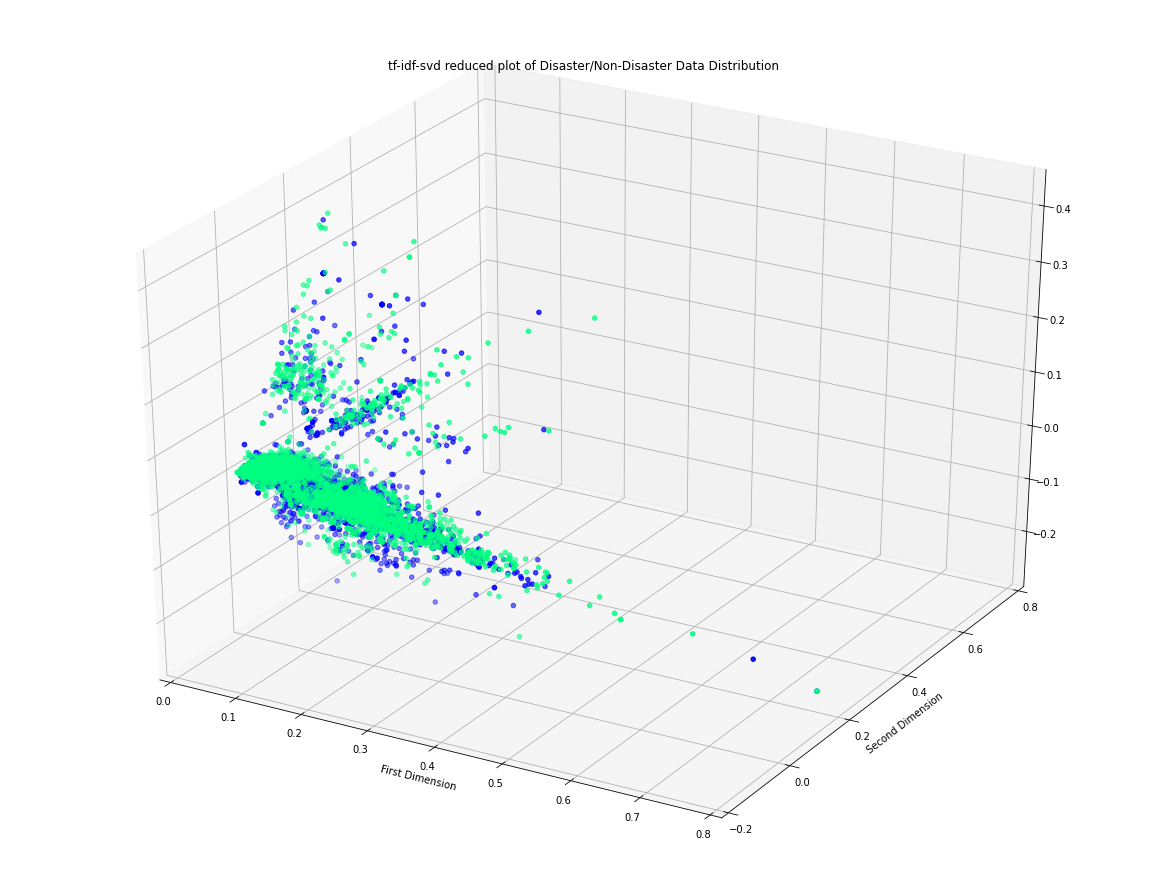

In [50]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)

ax.scatter3D(
    tfidf_svd[:, 0],
    tfidf_svd[:, 1],
    tfidf_svd[:, 2],
    c=train_eda['target'],
    marker='o',
    cmap=plt.cm.winter_r
)

plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Distribution')
plt.xlim((0, 0.8))
plt.ylim((-0.2, 0.8))
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()

## 6.2 Random 3 dimensions of the Latent Semantic Space

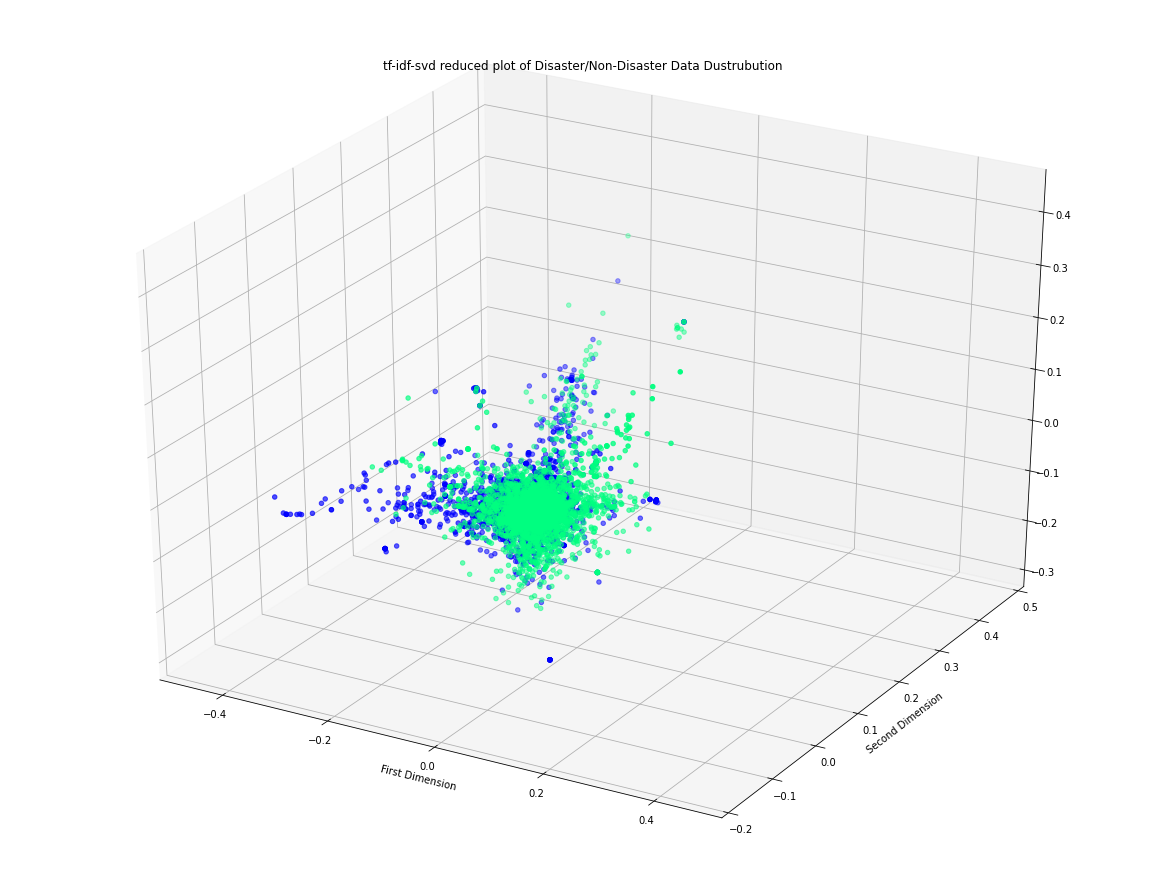

In [58]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
ax.scatter3D(
    tfidf_svd[:, 24],
    tfidf_svd[:, 25],
    tfidf_svd[:, 26],
    c=train_eda['target'],
    marker='o',
    cmap=plt.cm.winter_r
)

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Dustrubution')
plt.xlim((-0.5, 0.5))
plt.ylim((-0.2, 0.5))
plt.show()

## 6.3 Last 3 dimensions of the Lattent Semantic Space

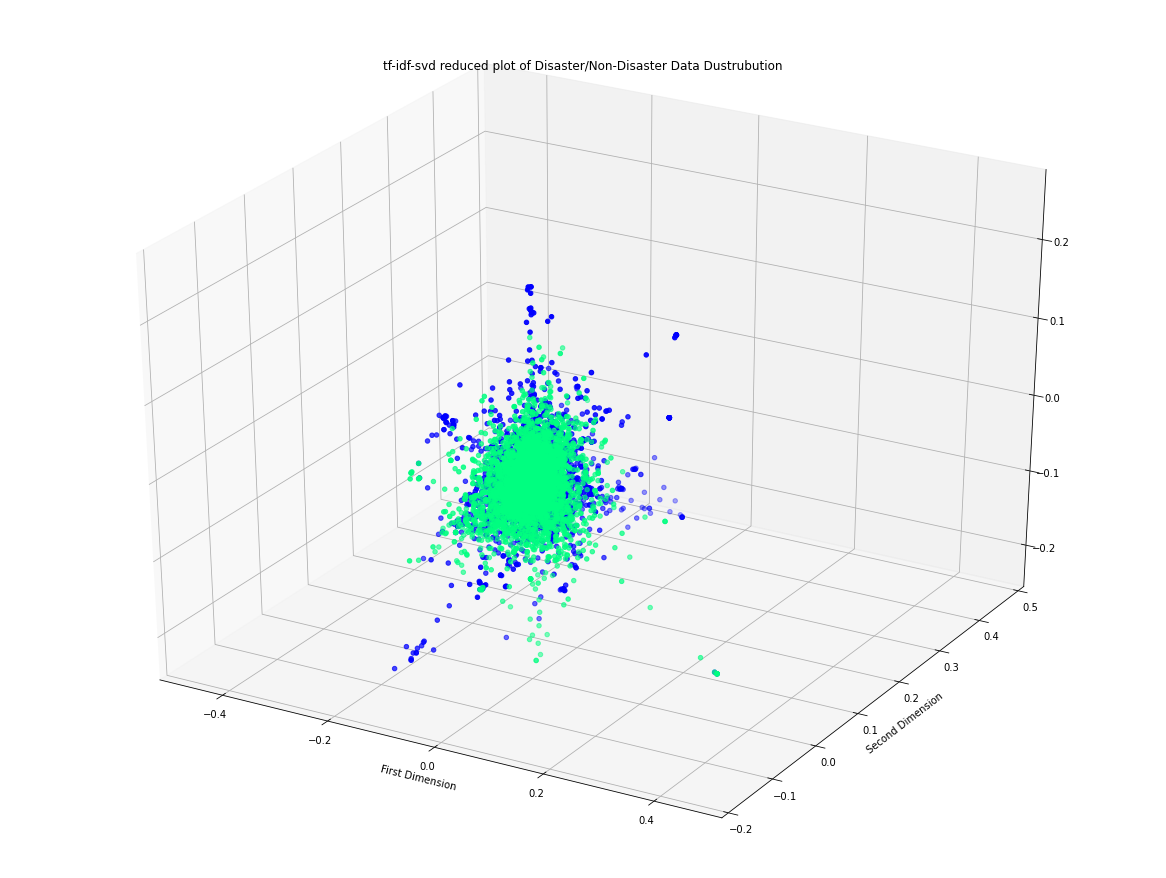

In [59]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
ax.scatter3D(
    tfidf_svd[:, -3],
    tfidf_svd[:, -2],
    tfidf_svd[:, -1],
    c=train_eda['target'],
    cmap=plt.cm.winter_r,
)

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Dustrubution')
plt.xlim((-0.5, 0.5))
plt.ylim((-0.2, 0.5))
plt.show()

# 7. Applying T-SNE(non-linera methods) to LSA reduced space

In [61]:
tsne = TSNE(
    n_components=2,
    early_exaggeration=12,
    learning_rate=100,
    n_iter=500,
    random_state=2020    
)
tfidf_svd_tsne = tsne.fit_transform(tfidf_svd)

In [62]:
tsne_svd_tsne_df = pd.DataFrame(tfidf_svd_tsne, columns=['x', 'y'])
tsne_svd_tsne_df['id'] = train_eda['id'].values
tsne_svd_tsne_df['text'] = train_eda['text'].values
tsne_svd_tsne_df['target'] = train_eda['target'].values
tsne_svd_tsne_df

x          y     id  \
0      1.096487  23.381800   9644   
1     -3.413109   0.589258   5664   
2    -34.159008  10.061013   3133   
3     -8.494637  -3.276288   6053   
4     13.782456   9.315883   8935   
...         ...        ...    ...   
7608  -1.748925 -15.391297   8066   
7609 -14.946484   5.627815  10037   
7610  12.541570 -30.550638   1523   
7611  14.287367  -4.293341   6497   
7612  -3.969029 -38.052631   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [70]:
output_notebook()
fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to tf-idf-svd space',
    tools='pan, wheel_zoom, box_zoom, reset, hover, save',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])

source = ColumnDataSource(
    data=dict(
        x=tsne_svd_tsne_df['x'],
        y=tsne_svd_tsne_df['y'],
        color=colormap[tsne_svd_tsne_df['target']],
        id=tsne_svd_tsne_df['id'],
        text=tsne_svd_tsne_df['text'],
        target=tsne_svd_tsne_df['target']        
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    legend='target',
    source=source,
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)

Loading BokehJS ...

## 8. Visualising T-SNE applied to LSA reduced space by changin Perplexity

In [72]:
tsne_50 = TSNE(
    n_components=2,
    perplexity=50,
    early_exaggeration=12,
    n_iter=500,
    random_state=2020
)
tfidf_svd_tsne50 = tsne_50.fit_transform(tfidf_svd)

In [76]:
tfidf_svd_tsne50_df = pd.DataFrame(tfidf_svd_tsne50, columns=['x', 'y'])
tfidf_svd_tsne50_df['id'] = train_eda['id'].values
tfidf_svd_tsne50_df['text'] = train_eda['text'].values
tfidf_svd_tsne50_df['target'] = train_eda['target'].values
tfidf_svd_tsne50_df

x          y     id  \
0    -28.328291  -9.322315   9644   
1    -17.101181  -2.163675   5664   
2    -43.392345  -3.726221   3133   
3     -7.189877  -9.333446   6053   
4      1.737947  -0.864803   8935   
...         ...        ...    ...   
7608  11.916115  -8.301630   8066   
7609 -14.268270  10.685102  10037   
7610   3.525719 -43.547401   1523   
7611  -6.696466 -28.532732   6497   
7612  28.386286 -32.314285   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [81]:
output_notebook()
fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to tf-idf-svd space',
    tools='pan, wheel_zoom, box_zoom, save, reset, help',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])

source = ColumnDataSource(
    dict(
        x=tfidf_svd_tsne50_df['x'],
        y=tfidf_svd_tsne50_df['y'],
        color=colormap[tfidf_svd_tsne50_df['target']],
        id=tfidf_svd_tsne50_df['id'],
        text=tfidf_svd_tsne50_df['text'],
        target=tfidf_svd_tsne50_df['target']
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    source=source,
    legend='target',
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)

Loading BokehJS ...

## 9. T-SNE applied on Doc2Vec embedding

In [91]:
texts = list(train_eda['text'])
documents = [TaggedDocument(doc, tags=[str(i)]) for i, doc in enumerate(texts)]
documents

[TaggedDocument(words=['OUN', 'continues', 'Severe', 'Thunderstorm', 'Warning', 'Oklahoma', 'OK', 'till', 'PM', 'CDT', 'http', 'co', 'oIM6Po8XCu'], tags=['0']),
 TaggedDocument(words=['In', 'India', 'people', 'taken', 'shelter', 'relief', 'camp', 'government', 'set', 'flood', 'http', 'co', 'eU8jypIzsd'], tags=['1']),
 TaggedDocument(words=['MH', 'Aircraft', 'debris', 'found', 'La', 'Reunion', 'missing', 'Malaysia', 'Airlines', 'ABC', 'Online', 'http', 'co', 'C5JuTFXBM9'], tags=['2']),
 TaggedDocument(words=['UAE', 'cool', 'Mideast', 'heat', 'wave', 'rain', 'watch', 'latest', 'video', 'NCMS', 'issue', 'warning', 'thundering', 'rain', 'poor', 'visibility', 'http', 'co', 'Tk', 'sKe0zm'], tags=['3']),
 TaggedDocument(words=['Photo', 'mothernaturenetwork', 'What', 'thundersnow', 'Hearing', 'thunder', 'snowstorm', 'extremely', 'uncommon', 'http', 'co', 'eYdAPauPvG'], tags=['4']),
 TaggedDocument(words=['I', 'want', 'everyone', 'know', 'Emilee', 'worried', 'I', 'getting', 'milkshake', 'suppos

In [92]:
model = Doc2Vec(
    documents, 
    vector_size=10, 
    window=2, 
    min_count=1, 
    workers=4
)

In [93]:
model.docvecs.vectors_docs.shape

(7613, 10)

In [94]:
tsne_model = TSNE(
    n_components=2,
    early_exaggeration=12,
    n_iter=500,
    random_state=2020
)

tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)
tsne_d2v_df = pd.DataFrame(tsne_d2v, columns=['x', 'y'])
tsne_d2v_df['id'] = train_eda['id'].values
tsne_d2v_df['text'] = train_eda['text'].values
tsne_d2v_df['target'] = train_eda['target'].values
tsne_d2v_df
# tsne_model = TSNE(
#     n_jobs=4,
#     early_exaggeration=4,
#     n_components=2,
#     verbose=1,
#     random_state=2020,
#     n_iter=500
# )
# tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

# tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=['x', 'y'])
# tsne_d2v_df['id'] = train_rebal['id'].values
# tsne_d2v_df['text'] = train_rebal['text'].values
# tsne_d2v_df['target'] = train_rebal['target'].values
# tsne_d2v_df

x          y     id  \
0     40.618649  -4.543056   9644   
1     40.832771 -12.249537   5664   
2     38.688290   8.103882   3133   
3     -5.238983  41.703125   6053   
4     35.634247 -24.661713   8935   
...         ...        ...    ...   
7608 -17.434135  40.325573   8066   
7609   9.613094  41.669258  10037   
7610  35.388863  32.426888   1523   
7611  26.130913  12.336135   6497   
7612   1.113925 -38.780392   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [98]:
output_notebook()

fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to Doc2Vec document embeddings',
    tools='pan, wheel_zoom, box_zoom, save, reset, help',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])
source = ColumnDataSource(
    dict(
        x=tsne_d2v_df['x'],
        y=tsne_d2v_df['y'],
        color=colormap[tsne_d2v_df['target']],
        id=tsne_d2v_df['id'],
        text=tsne_d2v_df['text'],
        target=tsne_d2v_df['target'],
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    legend='target',
    source=source,
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)






# output_notebook()

# plot_d2v = bp.figure(
#     plot_width=600, 
#     plot_height=600,
#     title='T-SNE applied to Doc2Vec document embeddings',
#     tools='pan, wheel_zoom, box_zoom, reset, hover, save',
#     x_axis_type=None,
#     y_axis_type=None,
#     min_border=1
# )

# colormap = np.array(['darkblue', 'cyan'])

# source = ColumnDataSource(
#     data=dict(
#         x=tsne_d2v_df['x'],
#         y=tsne_d2v_df['y'],
#         color=colormap[tsne_d2v_df['target']],
#         text=tsne_d2v_df['text'],
#         id=tsne_d2v_df['id'],
#         target=tsne_d2v_df['target'],
#     )
# )

# plot_d2v.scatter(
#     x='x',
#     y='y',
#     color='color',
#     legend='target',
#     source=source,
#     alpha=1.0
# )

# hover = plot_d2v.select(dict(type=HoverTool))
# hover.tooltips = {
#     'id': '@id',
#     'text': '@text',
#     'target': '@target',
# }

# show(plot_d2v)

Loading BokehJS ...

In [101]:
import pandas as pd

In [102]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

In [103]:
train_raw = pd.read_csv('./data/train.csv')
test_raw = pd.read_csv('./data/test.csv')

In [104]:
train_raw.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [105]:
test_raw.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [106]:
train_raw['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [107]:
target = train_raw[train_raw['target'] == 1]
non_target = train_raw[train_raw['target'] == 0]

dataset = target.append(non_target)
dataset

id  keyword location  \
0         1      NaN      NaN   
1         4      NaN      NaN   
2         5      NaN      NaN   
3         6      NaN      NaN   
4         7      NaN      NaN   
...     ...      ...      ...   
7581  10833  wrecked  Lincoln   
7582  10834  wrecked      NaN   
7584  10837      NaN      NaN   
7587  10841      NaN      NaN   
7593  10848      NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7581  @engineshed Great atmosphere at the British Li...       0  
7582  Cramer: Iger's 3 words that wrecked Disney's s...       0  
7584  These boxes are ready to explode! Exploding Ki...       0  
7587                                 Sirens everywhere!       0  
7593  I just heard a really loud bang and everyone i...       0  

[7613 rows x 5 columns]

In [108]:
import re

In [109]:
puncts=['☹', 'Ź', 'Ż', 'ἰ', 'ή', 'Š', '＞', 'ξ','ฉ', 'ั', 'น', 'จ', 'ะ', 'ท', 'ำ', 'ใ', 'ห', '้', 'ด', 'ี', '่', 'ส', 'ุ', 'Π', 'प', 'ऊ', 'Ö', 'خ', 'ب', 'ஜ', 'ோ', 'ட', '「', 'ẽ', '½', '△', 'É', 'ķ', 'ï', '¿', 'ł', '북', '한', '¼', '∆', '≥', '⇒', '¬', '∨', 'č', 'š', '∫', 'ḥ', 'ā', 'ī', 'Ñ', 'à', '▾', 'Ω', '＾', 'ý', 'µ', '?', '!', '.', ',', '"', '#', '$', '%', '\\', "'", '(', ')', '*', '+', '-', '/', ':', ';', '<', '=', '>', '@', '[', ']', '^', '_', '`', '{', '|', '}', '~', '“', '”', '’', 'é', 'á', '′', '…', 'ɾ', '̃', 'ɖ', 'ö', '–', '‘', 'ऋ', 'ॠ', 'ऌ', 'ॡ', 'ò', 'è', 'ù', 'â', 'ğ', 'म', 'ि', 'ल', 'ग', 'ई', 'क', 'े', 'ज', 'ो', 'ठ', 'ं', 'ड', 'Ž', 'ž', 'ó', '®', 'ê', 'ạ', 'ệ', '°', 'ص', 'و', 'ر', 'ü', '²', '₹', 'ú', '√', 'α', '→', 'ū', '—', '£', 'ä', '️', 'ø', '´', '×', 'í', 'ō', 'π', '÷', 'ʿ', '€', 'ñ', 'ç', 'へ', 'の', 'と', 'も', '↑', '∞', 'ʻ', '℅''ι', '•', 'ì', '−', 'л', 'я', 'д', 'ل', 'ك', 'م', 'ق', 'ا', '∈', '∩', '⊆', 'ã', 'अ', 'न', 'ु', 'स', '्', 'व', 'ा', 'र', 'त', '§', '℃', 'θ', '±', '≤', 'उ', 'द', 'य', 'ब', 'ट', '͡', '͜', 'ʖ', '⁴', '™', 'ć', 'ô', 'с', 'п', 'и', 'б', 'о', 'г', '≠', '∂', 'आ', 'ह', 'भ', 'ी', '³', 'च', '...', '⌚', '⟨', '⟩', '∖', '˂', 'ⁿ', '⅔', 'న', 'ీ', 'క', 'ె', 'ం', 'ద', 'ు', 'ా', 'గ', 'ర', 'ి', 'చ', 'র', 'ড়', 'ঢ়', 'સ', 'ં', 'ઘ', 'ર', 'ા', 'જ', '્', 'ય', 'ε', 'ν', 'τ', 'σ', 'ş', 'ś', 'س', 'ت', 'ط', 'ي', 'ع', 'ة', 'د', 'Å', '☺', 'ℇ', '❤', '♨', '✌', 'ﬁ', 'て', '„', 'Ā', 'ត', 'ើ', 'ប', 'ង', '្', 'អ', 'ូ', 'ន', 'ម', 'ា', 'ធ', 'យ', 'វ', 'ី', 'ខ', 'ល', 'ះ', 'ដ', 'រ', 'ក', 'ឃ', 'ញ', 'ឯ', 'ស', 'ំ', 'ព', 'ិ', 'ៃ', 'ទ', 'គ', '¢', 'つ', 'や', 'ค', 'ณ', 'ก', 'ล', 'ง', 'อ', 'ไ', 'ร', 'į', 'ی', 'ю', 'ʌ', 'ʊ', 'י', 'ה', 'ו', 'ד', 'ת', 'ᠠ', 'ᡳ', 'ᠰ', 'ᠨ', 'ᡤ', 'ᡠ', 'ᡵ', 'ṭ', 'ế', 'ध', 'ड़', 'ß', '¸', 'ч',  'ễ', 'ộ', 'फ', 'μ', '⧼', '⧽', 'ম', 'হ', 'া', 'ব', 'ি', 'শ', '্', 'প', 'ত', 'ন', 'য়', 'স', 'চ', 'ছ', 'ে', 'ষ', 'য', '়', 'ট', 'উ', 'থ', 'ক', 'ῥ', 'ζ', 'ὤ', 'Ü', 'Δ', '내', '제', 'ʃ', 'ɸ', 'ợ', 'ĺ', 'º', 'ष', '♭', '़', '✅', '✓', 'ě', '∘', '¨', '″', 'İ', '⃗', '̂', 'æ', 'ɔ', '∑', '¾', 'Я', 'х', 'О', 'з', 'ف', 'ن', 'ḵ', 'Č', 'П', 'ь', 'В', 'Φ', 'ỵ', 'ɦ', 'ʏ', 'ɨ', 'ɛ', 'ʀ', 'ċ', 'օ', 'ʍ', 'ռ', 'ք', 'ʋ', '兰', 'ϵ', 'δ', 'Ľ', 'ɒ', 'î', 'Ἀ', 'χ', 'ῆ', 'ύ', 'ኤ', 'ል', 'ሮ', 'ኢ', 'የ', 'ኝ', 'ን', 'አ', 'ሁ', '≅', 'ϕ', '‑', 'ả', '￼', 'ֿ', 'か', 'く', 'れ', 'ő', '－', 'ș', 'ן', 'Γ', '∪', 'φ', 'ψ', '⊨', 'β', '∠', 'Ó', '«', '»', 'Í', 'க', 'வ', 'ா', 'ம', '≈', '⁰', '⁷', 'ấ', 'ũ', '눈', '치', 'ụ', 'å', '،', '＝', '（', '）', 'ə', 'ਨ', 'ਾ', 'ਮ', 'ੁ', '︠', '︡', 'ɑ', 'ː', 'λ', '∧', '∀', 'Ō', 'ㅜ', 'Ο', 'ς', 'ο', 'η', 'Σ', 'ण']
odds=[ '大','能', '化', '生', '水', '谷', '精', '微', 'ル', 'ー', 'ジ', 'ュ', '支', '那', '¹', 'マ', 'リ', '仲', '直', 'り', 'し', 'た', '主', '席', '血', '⅓', '漢', '髪', '金', '茶', '訓', '読', '黒', 'ř', 'あ', 'わ', 'る', '胡', '南', '수', '능', '广', '电', '总', 'ί', '서', '로', '가', '를', '행', '복', '하', '게', '기', '乡', '故', '爾', '汝', '言', '得', '理', '让', '骂', '野', '比', 'び', '太', '後', '宮', '甄', '嬛', '傳', '做', '莫', '你', '酱', '紫', '甲', '骨', '陳', '宗', '陈', '什', '么', '说', '伊', '藤', '長', 'ﷺ', '僕', 'だ', 'け', 'が', '街', '◦', '火', '团', '表',  '看', '他', '顺', '眼', '中', '華', '民', '國', '許', '自', '東', '儿', '臣', '惶', '恐', 'っ', '木', 'ホ', 'ج', '教', '官', '국', '고', '등', '학', '교', '는', '몇', '시', '간', '업', '니', '本', '語', '上', '手', 'で', 'ね', '台', '湾', '最', '美', '风', '景', 'Î', '≡', '皎', '滢', '杨', '∛', '簡', '訊', '短', '送', '發', 'お', '早', 'う', '朝', 'ش', 'ه', '饭', '乱', '吃', '话', '讲', '男', '女', '授', '受', '亲', '好', '心', '没', '报', '攻', '克', '禮', '儀', '統', '已', '經', '失', '存', '٨', '八', '‛', '字', '：', '别', '高', '兴', '还', '几', '个', '条', '件', '呢', '觀', '《', '》', '記', '宋', '楚', '瑜', '孫', '瀛', '枚', '无', '挑', '剔', '聖', '部', '頭', '合', '約', 'ρ', '油', '腻', '邋', '遢', 'ٌ', 'Ä', '射', '籍', '贯', '老', '常', '谈', '族', '伟', '复', '平', '天', '下', '悠', '堵', '阻', '愛', '过', '会', '俄', '罗', '斯', '茹', '西', '亚', '싱', '관', '없', '어', '나', '이', '키', '夢', '彩', '蛋', '鰹', '節', '狐', '狸', '鳳', '凰', '露', '王', '晓', '菲', '恋', 'に', '落', 'ち', 'ら', 'よ', '悲', '反', '清', '復', '明', '肉', '希', '望', '沒', '公', '病', '配', '信', '開', '始', '日', '商', '品', '発', '売', '分', '子', '创', '意', '梦', '工', '坊', 'ک', 'پ', 'ڤ', '蘭', '花', '羡', '慕', '和', '嫉', '妒', '是', '样', 'ご', 'め', 'な', 'さ', 'い', 'す', 'み', 'ま', 'せ', 'ん', '音', '红', '宝', '书', '封', '柏', '荣', '江', '青', '鸡', '汤', '文', '粵', '拼', '寧', '可', '錯', '殺', '千', '絕', '放', '過', '」', '之', '勢', '请', '国', '知', '识', '产', '权', '局', '標', '點', '符', '號', '新', '年', '快', '乐', '学', '业', '进', '步', '身', '体', '健', '康', '们', '读', '我', '的', '翻', '译', '篇', '章', '欢', '迎', '入', '坑', '有', '毒', '黎', '氏', '玉', '英', '啧', '您', '这', '口', '味', '奇', '特', '也', '就', '罢', '了', '非', '要', '以', '此', '为', '依', '据', '对', '人', '家', '批', '判', '一', '番', '不', '地', '道', '啊', '谢', '六', '佬']
specials = ["’", "‘", "´", "`"]
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",  "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would", "there'd've": "there would have","there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [110]:
def clean_numbers(text):
    text = re.sub(r'[0-9]{5, }', ' ##### ', text)
    text = re.sub(r'[0-9]{4}', ' #### ', text)
    text = re.sub(r'[0-9]{3}', ' ### ', text)
    text = re.sub(r'[0-9]{2}', ' ## ', text)
    return text
    
def clean_contractions(text):
    for char in specials:
        text = text.replace(char, "'")
    text = ' '.join([contraction_mapping[token] if token in contraction_mapping else token for token in text.split()])
    return text

def clean_spaces(text):
    text = re.sub(r'[\\s]{2, }', ' ', text)
    return text

def add_space_punctuations(text):
    for char in puncts:
        text = text.replace(char, f' {char} ')
    return text

def add_space_odds(text):
    for char in odds:
        text = text.replace(char, f' {char} ')
    return text

In [111]:
dataset['text'] = dataset['text'].apply(lambda x: clean_contractions(x))
dataset['text'] = dataset['text'].apply(lambda x: add_space_punctuations(x))
dataset['text'] = dataset['text'].apply(lambda x: add_space_odds(x))
dataset['text'] = dataset['text'].apply(lambda x: clean_numbers(x))
dataset['text'] = dataset['text'].apply(lambda x: clean_spaces(x))
dataset

id  keyword location  \
0         1      NaN      NaN   
1         4      NaN      NaN   
2         5      NaN      NaN   
3         6      NaN      NaN   
4         7      NaN      NaN   
...     ...      ...      ...   
7581  10833  wrecked  Lincoln   
7582  10834  wrecked      NaN   
7584  10837      NaN      NaN   
7587  10841      NaN      NaN   
7593  10848      NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this  # earthquake...       1  
1              Forest fire near La Ronge Sask .  Canada       1  
2     All residents asked to  ' shelter in place '  ...       1  
3      ##  ,  ###  people receive  # wildfires evacu...       1  
4     Just got sent this photo from Ruby  # Alaska a...       1  
...                                                 ...     ...  
7581   @ engineshed Great atmosphere at the British ...       0  
7582  Cramer :  Iger ' s 3 words that wrecked Disney...       0  
7584  These boxes are ready to explode !  Exploding ...       0  
7587                               Sirens everywhere !        0  
7593  I just heard a really loud bang and everyone i...       0  

[7613 rows x 5 columns]

In [112]:
import os

import nltk
from nltk.tokenize import word_tokenize

In [113]:
data_path = os.path.join(os.getcwd(), 'nltk_data')
if os.path.exists(data_path):
    nltk.data.path.append(data_path)
else:
    nltk.download()

In [114]:
dataset['token'] = dataset['text'].apply(lambda x: word_tokenize(x))
dataset

id  keyword location  \
0         1      NaN      NaN   
1         4      NaN      NaN   
2         5      NaN      NaN   
3         6      NaN      NaN   
4         7      NaN      NaN   
...     ...      ...      ...   
7581  10833  wrecked  Lincoln   
7582  10834  wrecked      NaN   
7584  10837      NaN      NaN   
7587  10841      NaN      NaN   
7593  10848      NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this  # earthquake...       1   
1              Forest fire near La Ronge Sask .  Canada       1   
2     All residents asked to  ' shelter in place '  ...       1   
3      ##  ,  ###  people receive  # wildfires evacu...       1   
4     Just got sent this photo from Ruby  # Alaska a...       1   
...                                                 ...     ...   
7581   @ engineshed Great atmosphere at the British ...       0   
7582  Cramer :  Iger ' s 3 words that wrecked Disney...       0   
7584  These boxes are ready to explode !  Exploding ...       0   
7587                               Sirens everywhere !        0   
7593  I just heard a really loud bang and everyone i...       0   

                                                  token  
0     [Our, Deeds, are, the, Reason, of, this, #, ea...  
1      [Forest, fire, near, La, Ronge, Sask, ., Canada]  
2     [All, residents, asked, to, ', shelter, in, pl...  
3     [#, #, ,, #, #, #, people, receive, #, wildfir...  
4     [Just, got, sent, this, photo, from, Ruby, #, ...  
...                                                 ...  
7581  [@, engineshed, Great, atmosphere, at, the, Br...  
7582  [Cramer, :, Iger, ', s, 3, words, that, wrecke...  
7584  [These, boxes, are, ready, to, explode, !, Exp...  
7587                            [Sirens, everywhere, !]  
7593  [I, just, heard, a, really, loud, bang, and, e...  

[7613 rows x 6 columns]

In [115]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from string import punctuation

In [116]:
def remove_punctuations(tokens):
    return [token for token in tokens if token not in punctuation]

def remove_stopwords(tokens):
    stops = stopwords.words('english')
    return [token for token in tokens if token not in stops]

def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for toekn in tokens]

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [117]:
dataset['token'] = dataset['token'].apply(lambda x: remove_punctuations(x))
dataset['token'] = dataset['token'].apply(lambda x: remove_stopwords(x))
dataset['token'] = dataset['token'].apply(lambda x: lemmatize_tokens(x))
dataset

id  keyword location  \
0         1      NaN      NaN   
1         4      NaN      NaN   
2         5      NaN      NaN   
3         6      NaN      NaN   
4         7      NaN      NaN   
...     ...      ...      ...   
7581  10833  wrecked  Lincoln   
7582  10834  wrecked      NaN   
7584  10837      NaN      NaN   
7587  10841      NaN      NaN   
7593  10848      NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this  # earthquake...       1   
1              Forest fire near La Ronge Sask .  Canada       1   
2     All residents asked to  ' shelter in place '  ...       1   
3      ##  ,  ###  people receive  # wildfires evacu...       1   
4     Just got sent this photo from Ruby  # Alaska a...       1   
...                                                 ...     ...   
7581   @ engineshed Great atmosphere at the British ...       0   
7582  Cramer :  Iger ' s 3 words that wrecked Disney...       0   
7584  These boxes are ready to explode !  Exploding ...       0   
7587                               Sirens everywhere !        0   
7593  I just heard a really loud bang and everyone i...       0   

                                                  token  
0     [Our, Deeds, Reason, earthquake, May, ALLAH, F...  
1         [Forest, fire, near, La, Ronge, Sask, Canada]  
2     [All, resident, asked, shelter, place, notifie...  
3     [people, receive, wildfire, evacuation, order,...  
4     [Just, got, sent, photo, Ruby, Alaska, smoke, ...  
...                                                 ...  
7581  [engineshed, Great, atmosphere, British, Lion,...  
7582  [Cramer, Iger, 3, word, wrecked, Disney, stock...  
7584  [These, box, ready, explode, Exploding, Kitten...  
7587                               [Sirens, everywhere]  
7593  [I, heard, really, loud, bang, everyone, aslee...  

[7613 rows x 6 columns]

### tf-idf

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
corpus = [' '.join(text) for text in list(dataset['token'])]
corpus

['Our Deeds Reason earthquake May ALLAH Forgive u',
 'Forest fire near La Ronge Sask Canada',
 'All resident asked shelter place notified officer No evacuation shelter place order expected',
 'people receive wildfire evacuation order California',
 'Just got sent photo Ruby Alaska smoke wildfire pours school',
 'RockyFire Update California Hwy closed direction due Lake County fire CAfire wildfire',
 'flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area',
 'I top hill I see fire wood',
 'There emergency evacuation happening building across street',
 'I afraid tornado coming area',
 'Three people died heat wave far',
 'Haha South Tampa getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding',
 'raining flooding Florida TampaBay Tampa day I lost count',
 'Flood Bago Myanmar We arrived Bago',
 'Damage school bus multi car crash BREAKING',
 'bbcmtd Wholesale Markets ablaze http co lHYXEOHY6C',
 'AFRICANBAZE 

In [120]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    min_df=5
)
tfidf = vectorizer.fit_transform(corpus)

In [123]:
print('Vocabulary List {} >>\n{}'.format(len(vectorizer.vocabulary_), vectorizer.vocabulary_))

Vocabulary List 4167 >>
{'reason': 2985, 'earthquake': 1106, 'allah': 114, 'forest': 1426, 'near': 2486, 'la': 2017, 'canada': 558, 'asked': 232, 'shelter': 3307, 'place': 2755, 'officer': 2578, 'evacuation': 1200, 'order': 2617, 'expected': 1225, 'people': 2706, 'wildfire': 4025, 'california': 532, 'evacuation order': 1203, 'just': 1970, 'got': 1547, 'sent': 3274, 'photo': 2728, 'alaska': 109, 'smoke': 3383, 'school': 3216, 'update': 3872, 'hwy': 1796, 'closed': 703, 'direction': 1009, 'lake': 2031, 'county': 800, 'flood': 1395, 'disaster': 1016, 'heavy': 1640, 'rain': 2954, 'cause': 601, 'flash': 1384, 'flooding': 1402, 'street': 3517, 'colorado': 734, 'springs': 3442, 'area': 198, 'heavy rain': 1641, 'hill': 1678, 'wood': 4056, 'emergency': 1142, 'happening': 1605, 'building': 500, 'afraid': 70, 'tornado': 3725, 'coming': 744, 'died': 1002, 'heat': 1635, 'wave': 3990, 'far': 1299, 'people died': 2708, 'heat wave': 1636, 'haha': 1591, 'south': 3411, 'getting': 1512, 'wait': 3951, 'se

In [125]:
print('Shape of tf-idf processed text : {}'.format(tfidf.shape))

Shape of tf-idf processed text : (7613, 4167)


### LSA

LSA is done by Truncated SVD of tf-idf document-term matrix

In [126]:
from sklearn.decomposition import TruncatedSVD

In [127]:
svd = TruncatedSVD(
    n_components=50,
    n_iter=500,
)

svd_tfidf = svd.fit_transform(tfidf)

In [128]:
print('Shape of tf-idf after SVD : {}'.format(svd_tfidf.shape))

Shape of tf-idf after SVD : (7613, 50)


**visualization**

In [132]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [131]:
%matplotlib inline

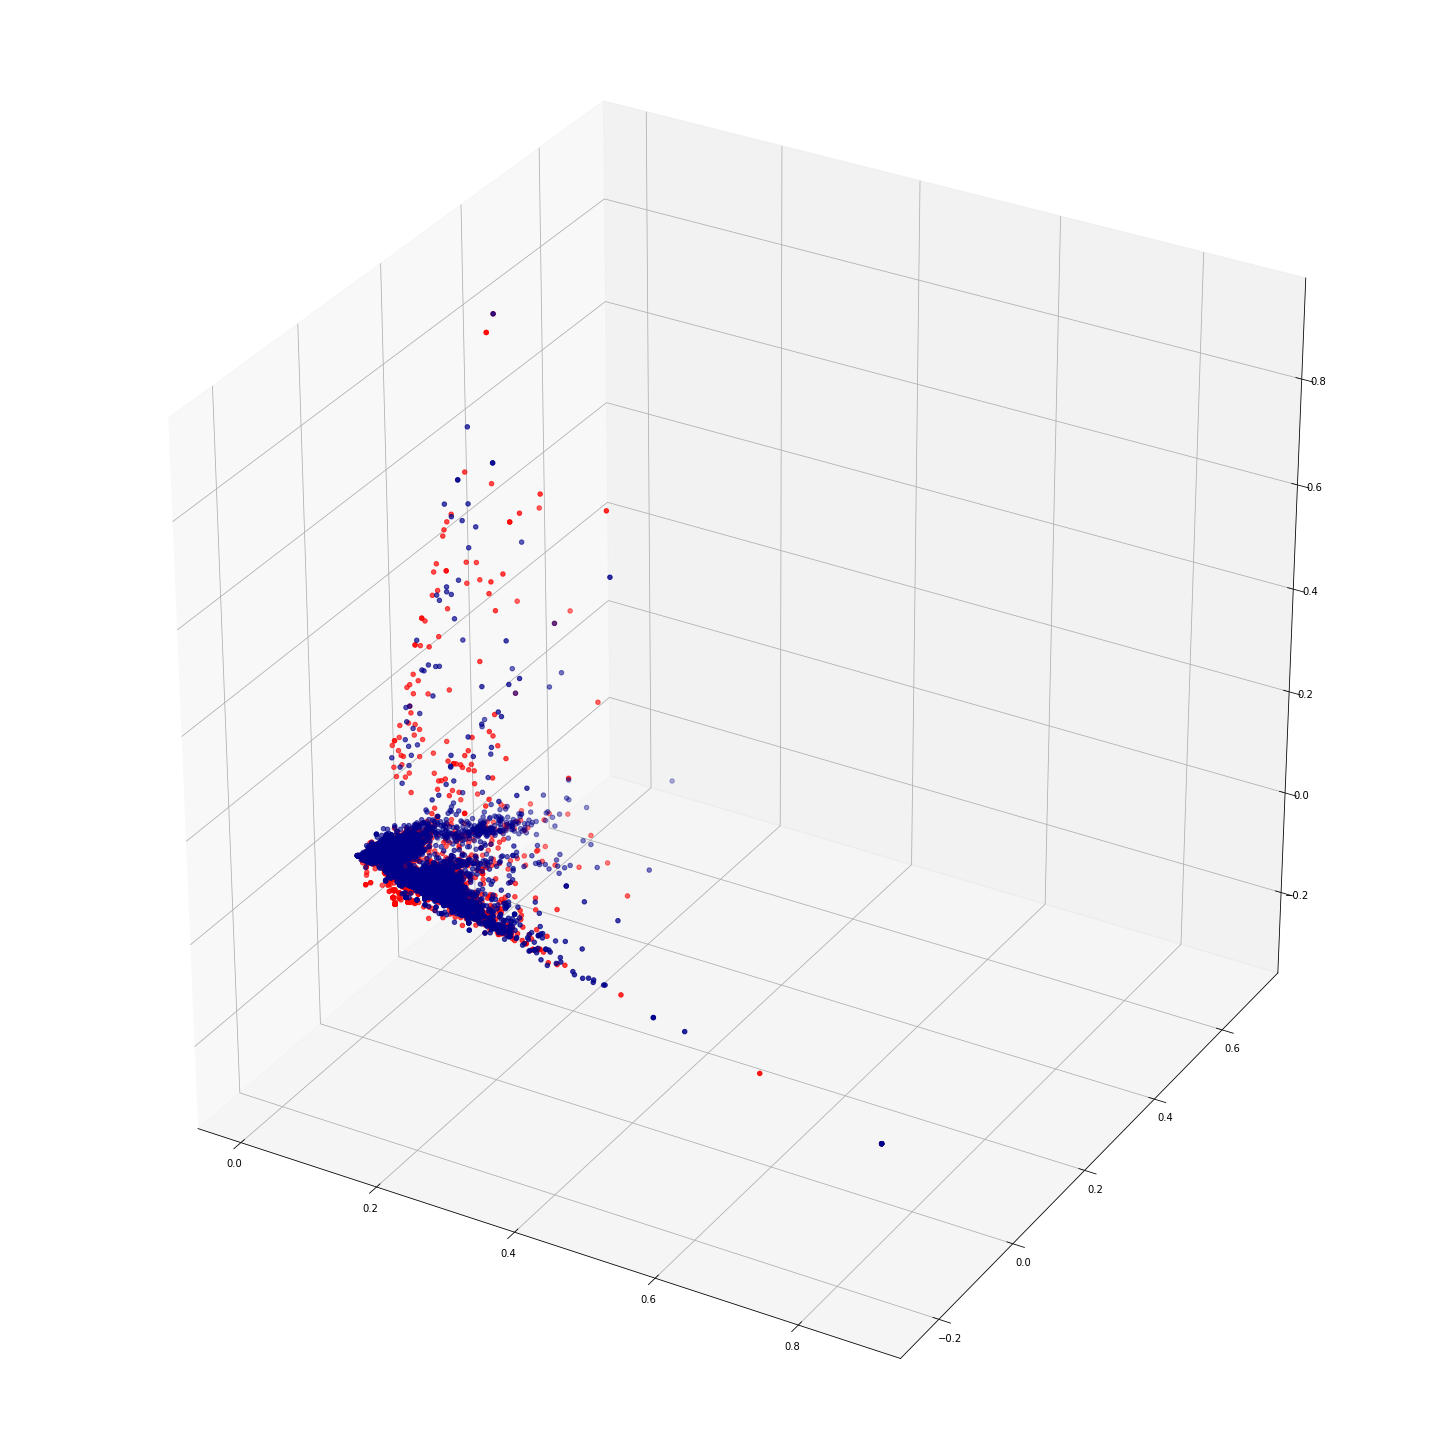

In [144]:
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)

colormap = ['darkblue', 'red']
color = list(map(lambda x: color[x], dataset['target']))
scatter = ax.scatter(
    svd_tfidf[:, 0],
    svd_tfidf[:, 1],
    svd_tfidf[:, 2],
    c=color
)

plt.show()

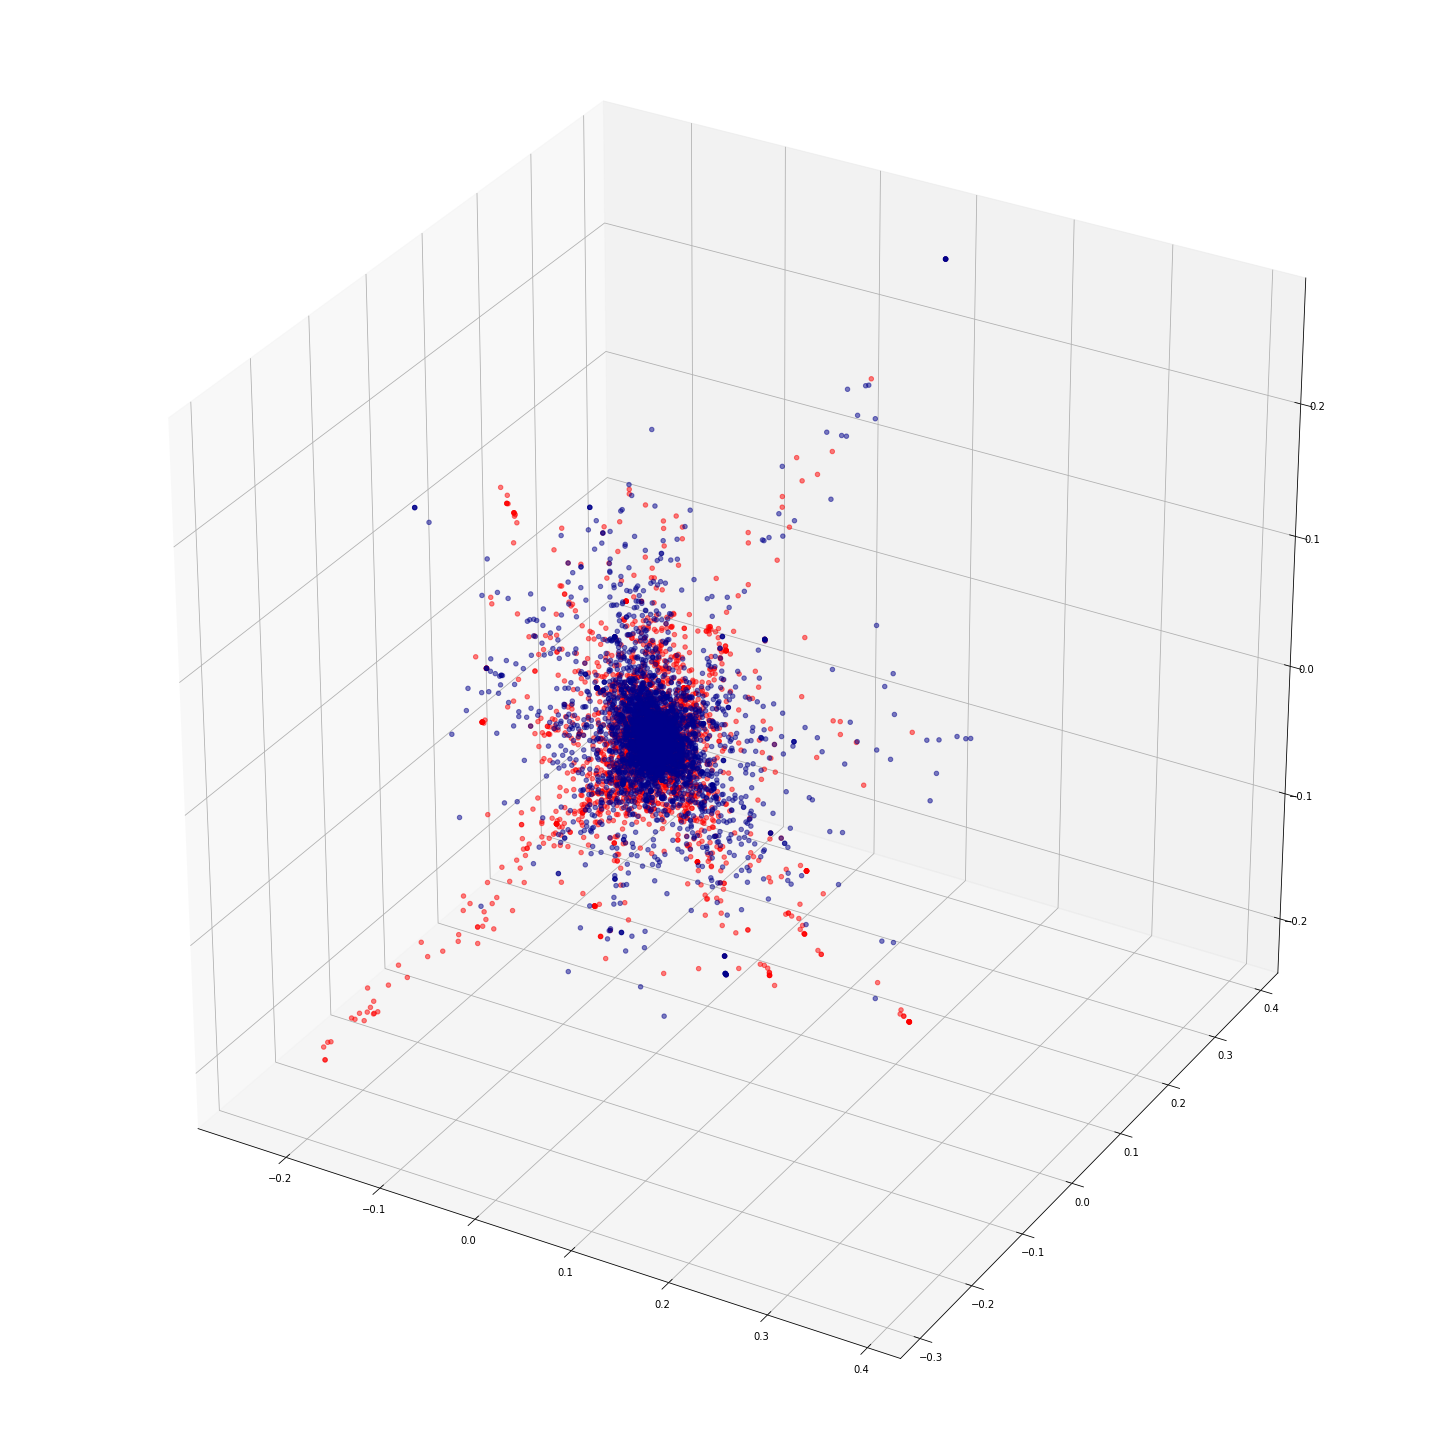

In [146]:
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)

colormap = ['darkblue', 'red']
color = list(map(lambda x: colormap[x], dataset['target']))

scatter = ax.scatter(
    svd_tfidf[:, -3],
    svd_tfidf[:, -2],
    svd_tfidf[:, -1],
    color=color,
    alpha=0.5
)

plt.show()

### T-SNE

Reduce 50 dimension of SVD to 2 dimension using T-SNE

In [147]:
from sklearn.manifold import TSNE

In [148]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration=12,
    n_iter=1000,
)

tsne_svd_tfidf = tsne.fit_transform(svd_tfidf)

In [149]:
print('Shape of TSNE Results: {}'.format(tsne_svd_tfidf.shape))

Shape of TSNE Results: (7613, 2)


In [150]:
dataset_tsne = pd.DataFrame(tsne_svd_tfidf, columns=['x', 'y'])
dataset_tsne['id'] = dataset['id']
dataset_tsne['token'] = dataset['token']
dataset_tsne['target'] = dataset['target']
dataset_tsne

x          y     id  \
0    -22.749735 -17.106647      1   
1    -24.439095  -4.411507      4   
2    -47.940536 -28.957970      5   
3     46.364956 -13.782966      6   
4     80.987373 -31.994917      7   
...         ...        ...    ...   
7608 -15.579947  19.899042  10869   
7609 -46.987583   5.751590  10870   
7610 -24.390078  32.837158  10871   
7611 -24.171854 -29.159275  10872   
7612 -56.175842   3.132201  10873   

                                                  token  target  
0     [Our, Deeds, Reason, earthquake, May, ALLAH, F...       1  
1         [Forest, fire, near, La, Ronge, Sask, Canada]       1  
2     [All, resident, asked, shelter, place, notifie...       1  
3     [people, receive, wildfire, evacuation, order,...       1  
4     [Just, got, sent, photo, Ruby, Alaska, smoke, ...       1  
...                                                 ...     ...  
7608  [Two, giant, crane, holding, bridge, collapse,...       1  
7609  [aria, ahrary, TheTawniest, The, control, wild...       1  
7610  [M1, UTC, 5km, S, Volcano, Hawaii, http, co, z...       1  
7611  [Police, investigating, e, bike, collided, car...       1  
7612  [The, Latest, More, Homes, Razed, Northern, Ca...       1  

[7613 rows x 5 columns]

In [153]:
import bokeh.plotting as bp
import bokeh.models as bm

In [158]:
bp.output_notebook()

colormap = ['darkblue', 'red']
color = list(map(lambda x: colormap[x], dataset_tsne['target']))

data = {
    'x': dataset_tsne['x'],
    'y': dataset_tsne['y'],
    'id': dataset_tsne['id'],
    'token': dataset_tsne['token'],
    'target': dataset_tsne['target'],
    'color': color
}

source = bm.ColumnDataSource(
    data=data
)

TOOLTIPS = [
    ("id", "@id"),
    ("token", "@token"),
    ("target", "@target"),
]

p = bp.figure(
    title='Basic TSNE Results',
    plot_width=800,
    plot_height=800,
    tooltips=TOOLTIPS,
    x_axis_type=None,
    y_axis_type=None,
    tools='pan, wheel_zoom, box_zoom, reset, save'
)

p.scatter(
    x='x',
    y='y',
    color='color',
    source=source
)

bp.show(p)

Loading BokehJS ...

### Doc2Vec

Using Doc2Vec Algorithm to represent documents, instead of tf-idf + reduction(LSA)

In [159]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [162]:
texts = [' '.join(tokens) for tokens in dataset['token']]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
documents

[TaggedDocument(words='Our Deeds Reason earthquake May ALLAH Forgive u', tags=[0]),
 TaggedDocument(words='Forest fire near La Ronge Sask Canada', tags=[1]),
 TaggedDocument(words='All resident asked shelter place notified officer No evacuation shelter place order expected', tags=[2]),
 TaggedDocument(words='people receive wildfire evacuation order California', tags=[3]),
 TaggedDocument(words='Just got sent photo Ruby Alaska smoke wildfire pours school', tags=[4]),
 TaggedDocument(words='RockyFire Update California Hwy closed direction due Lake County fire CAfire wildfire', tags=[5]),
 TaggedDocument(words='flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area', tags=[6]),
 TaggedDocument(words='I top hill I see fire wood', tags=[7]),
 TaggedDocument(words='There emergency evacuation happening building across street', tags=[8]),
 TaggedDocument(words='I afraid tornado coming area', tags=[9]),
 TaggedDocument(words='Three people died heat wave far', tags=[

In [ ]:
model = Doc2Vec(
    documents,
    vector_size=10,
    min_count=5,
    worker=4
)

In [ ]:
print('Shape of model: {}'.format(model.shape))

# Disaster Tweet NLP

This is Kaggle Competitiong to find whether each tweet is 'Disaster' or 'Non-Disaster'.<br>
Use NLP Techniques, such as LSA and Doc2Vec to see global traits of text data.<br>
Finally classifier is made using Keras Style RNN Model
<hr>

## Thanks to...<br>

**Official Documentation**
> [sci-kit learn: TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)<br>
> [sci-kit learn: TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)<br>
> [sci-kit learn: TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)<br>
> [matplotlib: Axes3D](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html)<br>
> [matplotlib: Axes3D.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)<br>
> [matplotlib: Axes3D.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)<br>
> [bokeh: ColumnDataSource](https://docs.bokeh.org/en/latest/docs/user_guide/data.html)<br>
> [bokeh: HoverTool](https://docs.bokeh.org/en/latest/docs/user_guide/tools.html)<br>
> [gensim: Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)<br>
> [pyspellchecker](https://pyspellchecker.readthedocs.io/en/latest/)<br>

**Kaggle Kernel**
> [Disaster Tweets: Understanding Data & Basic model](https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model#3.-Resampling-the-training-data)<br>
> [Comprehensive NLP Tutorial-1:ML Perspective](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-1-ml-perspective)<br>


**Other Resources**
> [웹 플롯을 위한 bokeh 패키지 소개](https://datascienceschool.net/view-notebook/b03af554a1494f159fc94d65d70fe7b2/) - explains bokeh library<br>


<a id='toc'></a>
## Table of Contents
0. [Prepare Data](#0)
    1. [Load Data](#0.1)
    2. [Shape of Data](#0.2)
    3. [Show Data Sample](#0.3)
    4. [Reformat Dataset](#0.4)
1. [Cleaning Text Data](#1)
    1. [Standarization](#1.1)
        1. [Lower Alphabet](#1.1.1)
        2. [Correct Alphabet](#1.1.2)
    2. [Remove Irrelevant](#1.2)
        1. [Remove contractions](#1.2.1)
        2. [Remove Link](#1.2.2)
        3. [Remove punctuations](#1.2.3)
        4. [Remove numbers](#1.2.4)
        5. [Remove Non-English](#1.2.5)
        6. [Remove stopwords](#1.2.6)
        7. [Remove spaces](#1.2.7)
    3. [Tokenization with Stemming/Lemmatizing](#1.3)
        1. [Stemming or Lemmatizing](#1.3.1)
        2. [Tokenization](#1.3.2)
2. [Processing Text Data](#2)
    1. [TF-IDF Vectorization](#2.1)
    2. [TF-IDF Vectorization with SVD (LSA)](#2.2)
        1. [Visualization with 3D](#2.2.1)
        2. [Visualization with 2D after T-SNE](#2.2.2)
    3. [Doc2Vec Vectorization](#2.3)
3. [Classifier Modeling](#3)
    1. [Prepare Train and Test Data](#3.1)
    2. [Modeling](#3.2)

## 0. Prepare Data <a id="0"></a> 
[back to table of contents](#toc)

**import library: pandas + setting**

In [49]:
import pandas as pd

In [50]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

### 0.1 Load Data <a id="0.1"></a>
[back to table of contents](#toc)

In [51]:
raw_train = pd.read_csv('./data/train.csv')  # local path for data
raw_test = pd.read_csv('./data/test.csv')    # local path for data

### 0.2 Shape of Data <a id="0.2"></a>
[back to table of contents](#toc)

In [52]:
print('** Shape of train data **')
raw_train.shape

** Shape of train data **


(7613, 5)

In [53]:
print('** Shape of test data **') 
raw_test.shape

** Shape of test data **


(3263, 4)

### 0.3 Show Data Sample <a id="0.3"></a>
[back to table of contents](#toc)

In [54]:
print('** Sample Data in train **')
raw_train.head()

** Sample Data in train **


id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [55]:
print('** Samle Data in test **')
raw_test.head()

** Samle Data in test **


id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

### 0.4 Reformat Dataset <a id="0.4"></a>
[back to table of contents](#toc)

Reformat Dataset to get all the text information to be processed.<br>
Test data, which has no target value would have target -1.<br>
dataset is ordered based on target train data to test data, whihc has target value 1 and 0 to -1

In [56]:
train_target = raw_train[raw_train['target'] == 1]
train_non_target = raw_train[raw_train['target'] == 0]
dataset = train_target.append(train_non_target)

dataset = dataset.append(raw_test)
dataset = dataset.reset_index()
dataset['target'] = dataset['target'].fillna(-1)
dataset['target'] = dataset['target'].astype('int64')
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  
0      Our Deeds are the Reason of this #earthquake M...       1  
1                 Forest fire near La Ronge Sask. Canada       1  
2      All residents asked to 'shelter in place' are ...       1  
3      13,000 people receive #wildfires evacuation or...       1  
4      Just got sent this photo from Ruby #Alaska as ...       1  
...                                                  ...     ...  
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1  
10872  Storm in RI worse than last hurricane. My city...      -1  
10873  Green Line derailment in Chicago http://t.co/U...      -1  
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1  
10875  #CityofCalgary has activated its Municipal Eme...      -1  

[10876 rows x 6 columns]

## 1. Cleaning Text Data <a id="1"></a>
[back to table of contents](#toc)

### 1.1 Standarization <a id="1.1"></a>
[back to table of contents](#toc)

#### 1.1.1 Lower Alphabet <a id="1.1.1"></a>
[back to table of contents](#toc)

In [57]:
def lower_text(text):
    return text.lower()

In [58]:
print('** lower text **')
print(lower_text('Hello World'))

** lower text **
hello world


In [59]:
dataset['text_cleaned'] = dataset['text'].apply(lambda x: lower_text(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this #earthquake m...  
1                 forest fire near la ronge sask. canada  
2      all residents asked to 'shelter in place' are ...  
3      13,000 people receive #wildfires evacuation or...  
4      just got sent this photo from ruby #alaska as ...  
...                                                  ...  
10871  earthquake safety los angeles ûò safety faste...  
10872  storm in ri worse than last hurricane. my city...  
10873  green line derailment in chicago http://t.co/u...  
10874  meg issues hazardous weather outlook (hwo) htt...  
10875  #cityofcalgary has activated its municipal eme...  

[10876 rows x 7 columns]

#### 1.1.2 Correct Alphabet <a id="1.1.2"></a>
[back to table of contents](#toc)

**import library: spellchecker**

In [60]:
from spellchecker import SpellChecker

In [61]:
def spell_check_text(text):
    spell = SpellChecker()
    mispelled = spell.unknown(text.split())
    corrected = list()
    for t in text.split():
        if t in mispelled:
            t = spell.correction(t)
        corrected.append(t)
    
    return ' '.join(corrected)

In [62]:
print('** spell checking text **')
print(spell_check_text('something is happeneing here'))

** spell checking text **
something is happening here


In [ ]:
'''
Time Consuming Job. Not done in locally
''' 

# for idx in range(dataset.shape[0]):
#     text = dataset.loc[idx, 'text_cleaned']
#     dataset.loc[idx, 'text_cleaned'] = spell_check_text(text)

#     if idx % 5 == 0:
#         print('[{:5d}/{}]({:.2%}) spell checking finished'.format(idx + 1, dataset.shape[0], (idx + 1) / dataset.shape[0]))
# dataset

[    1/10876](0.01%) spell checking finished
[    6/10876](0.06%) spell checking finished
[   11/10876](0.10%) spell checking finished
[   16/10876](0.15%) spell checking finished
[   21/10876](0.19%) spell checking finished
[   26/10876](0.24%) spell checking finished
[   31/10876](0.29%) spell checking finished
[   36/10876](0.33%) spell checking finished
[   41/10876](0.38%) spell checking finished
[   46/10876](0.42%) spell checking finished
[   51/10876](0.47%) spell checking finished
[   56/10876](0.51%) spell checking finished
[   61/10876](0.56%) spell checking finished
[   66/10876](0.61%) spell checking finished
[   71/10876](0.65%) spell checking finished
[   76/10876](0.70%) spell checking finished
[   81/10876](0.74%) spell checking finished
[   86/10876](0.79%) spell checking finished
[   91/10876](0.84%) spell checking finished
[   96/10876](0.88%) spell checking finished
[  101/10876](0.93%) spell checking finished
[  106/10876](0.97%) spell checking finished
[  111/108

### 1.2 Remove Irrelevant <a id="1.2"></a>
[back to table of contents](#toc)

#### 1.2.1 Remove contractions <a id="1.2.1"></a>
[back to table of contents](#toc)

In [63]:
NON_OFFICLA_QUOTES = ["’", "‘", "´", "`"]
CONSTRACTIONS = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",  "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would", "there'd've": "there would have","there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [64]:
def remove_contraction(text):
    for char in NON_OFFICLA_QUOTES:
        text = text.replace(char, "'")
    
    removed = list()
    for t in text.split():
        t = CONSTRACTIONS[t] if t in CONSTRACTIONS else t
        removed.append(t)
    return ' '.join(removed)

In [65]:
print('** remove contraction **')
print(remove_contraction("you're not cazy. can't you see?"))

** remove contraction **
you are not cazy. cannot you see?


In [66]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_contraction(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this #earthquake m...  
1                 forest fire near la ronge sask. canada  
2      all residents asked to 'shelter in place' are ...  
3      13,000 people receive #wildfires evacuation or...  
4      just got sent this photo from ruby #alaska as ...  
...                                                  ...  
10871  earthquake safety los angeles ûò safety faste...  
10872  storm in ri worse than last hurricane. my city...  
10873  green line derailment in chicago http://t.co/u...  
10874  meg issues hazardous weather outlook (hwo) htt...  
10875  #cityofcalgary has activated its municipal eme...  

[10876 rows x 7 columns]

#### 1.2.2 Remove Link <a id="1.2.2"></a>
[back to table of contents](#toc)

**import library: re**

In [67]:
import re

In [68]:
def remove_link(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    return text

In [69]:
print('** remove_link **')
print(remove_link('www.google.com is happening here https://link.com http://www.com'))

** remove_link **
 is happening here  


In [70]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_link(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this #earthquake m...  
1                 forest fire near la ronge sask. canada  
2      all residents asked to 'shelter in place' are ...  
3      13,000 people receive #wildfires evacuation or...  
4      just got sent this photo from ruby #alaska as ...  
...                                                  ...  
10871  earthquake safety los angeles ûò safety faste...  
10872  storm in ri worse than last hurricane. my city...  
10873                  green line derailment in chicago   
10874        meg issues hazardous weather outlook (hwo)   
10875  #cityofcalgary has activated its municipal eme...  

[10876 rows x 7 columns]

#### 1.2.3 Remove punctuations <a id="1.2.3"></a>
[back to table of contents](#toc)

**import library: string**

In [71]:
from string import punctuation

In [72]:
def remove_punctuation(text):
    removed = list()
    for t in text.split():
        for p in punctuation:
            t = t.replace(p, '')
        removed.append(t)
    return ' '.join(removed)

In [73]:
print('** remove punctuation **')
print(remove_punctuation('something. .. is# ha!!ppening $he.''re'))

** remove punctuation **
something  is happening here


In [74]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_punctuation(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this earthquake ma...  
1                  forest fire near la ronge sask canada  
2      all residents asked to shelter in place are be...  
3      13000 people receive wildfires evacuation orde...  
4      just got sent this photo from ruby alaska as s...  
...                                                  ...  
10871  earthquake safety los angeles ûò safety faste...  
10872  storm in ri worse than last hurricane my citya...  
10873                   green line derailment in chicago  
10874           meg issues hazardous weather outlook hwo  
10875  cityofcalgary has activated its municipal emer...  

[10876 rows x 7 columns]

#### 1.2.4 Remove numbers <a id="1.2.4"></a>
[back to table of contents](#toc)

In [75]:
def remove_number(text):
    text = re.sub(r'[0-9]+', '', text)
    return text

In [76]:
print('** remove number **')
print(remove_number('someth134134ing is334 341 ha333ppe234nin341g 43he31re'))

** remove number **
something is  happening here


In [77]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_number(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this earthquake ma...  
1                  forest fire near la ronge sask canada  
2      all residents asked to shelter in place are be...  
3       people receive wildfires evacuation orders in...  
4      just got sent this photo from ruby alaska as s...  
...                                                  ...  
10871  earthquake safety los angeles ûò safety faste...  
10872  storm in ri worse than last hurricane my citya...  
10873                   green line derailment in chicago  
10874           meg issues hazardous weather outlook hwo  
10875  cityofcalgary has activated its municipal emer...  

[10876 rows x 7 columns]

#### 1.2.5 Remove Non-English <a id="1.2.5"></a>
[back to table of contents](#toc)

In [78]:
def remove_non_enlgish(text):
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
    return text

In [79]:
print('** remove non-enlgish **')
print(remove_non_enlgish('안녕하세요 is hello 인거\x89ûò지you what i mean'))

** remove non-enlgish **
 is hello you what i mean


In [80]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_non_enlgish(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0      our deeds are the reason of this earthquake ma...  
1                  forest fire near la ronge sask canada  
2      all residents asked to shelter in place are be...  
3       people receive wildfires evacuation orders in...  
4      just got sent this photo from ruby alaska as s...  
...                                                  ...  
10871  earthquake safety los angeles safety fasteners...  
10872  storm in ri worse than last hurricane my citya...  
10873                   green line derailment in chicago  
10874           meg issues hazardous weather outlook hwo  
10875  cityofcalgary has activated its municipal emer...  

[10876 rows x 7 columns]

#### 1.2.6 Remove stopwords <a id="1.2.6"></a>
[back to table of contents](#toc)

**import library: os, nltk**

In [81]:
import os
import nltk
from nltk.corpus import stopwords

In [82]:
data_path = os.path.join(os.getcwd(), 'nltk_data')
if os.path.exists(data_path):
    nltk.data.path.append(data_path)
else:
    nltk.download()

In [83]:
def remove_stopword(text):
    stop = stopwords.words('english')
    removed = [t for t in text.split() if t not in stop]
    return ' '.join(removed)

In [84]:
print('** remove stopword **')
print(remove_stopword('the crayon is the to in hello'))

** remove stopword **
crayon hello


In [85]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_stopword(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0           deeds reason earthquake may allah forgive us  
1                  forest fire near la ronge sask canada  
2      residents asked shelter place notified officer...  
3      people receive wildfires evacuation orders cal...  
4      got sent photo ruby alaska smoke wildfires pou...  
...                                                  ...  
10871  earthquake safety los angeles safety fasteners...  
10872  storm ri worse last hurricane cityampothers ha...  
10873                      green line derailment chicago  
10874           meg issues hazardous weather outlook hwo  
10875  cityofcalgary activated municipal emergency pl...  

[10876 rows x 7 columns]

#### 1.2.7 Remove spaces <a id="1.2.7"></a>
[back to table of contents](#toc)

In [86]:
def remove_space(text):
    text = text.strip()
    text = re.sub(r'[\s][\s]+', ' ', text)
    return text

In [87]:
print('** remove space **')
print(remove_space('  something    is    happeing  '))

** remove space **
something is happeing


In [88]:
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_space(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  
0           deeds reason earthquake may allah forgive us  
1                  forest fire near la ronge sask canada  
2      residents asked shelter place notified officer...  
3      people receive wildfires evacuation orders cal...  
4      got sent photo ruby alaska smoke wildfires pou...  
...                                                  ...  
10871  earthquake safety los angeles safety fasteners...  
10872  storm ri worse last hurricane cityampothers ha...  
10873                      green line derailment chicago  
10874           meg issues hazardous weather outlook hwo  
10875  cityofcalgary activated municipal emergency pl...  

[10876 rows x 7 columns]

### 1.3 Tokenization with Stemming/Lemmatizing <a id="1.3"></a>
[back to table of contents](#toc)

#### 1.3.1 Stemming or Lemmatizing <a id="1.3.1"></a>
[back to table of contents](#toc)

**import library: nltk**

In [89]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [90]:
def stemming(text):
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(t) for t in text.split()]
    return ' '.join(stemmed)

In [91]:
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(t) for t in text.split()]
    return ' '.join(lemmatized)

In [92]:
dataset['text_stemmed'] = dataset['text_cleaned'].apply(lambda x: stemming(x))
dataset['text_lemmatized'] = dataset['text_cleaned'].apply(lambda x: lemmatizing(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  \
0           deeds reason earthquake may allah forgive us   
1                  forest fire near la ronge sask canada   
2      residents asked shelter place notified officer...   
3      people receive wildfires evacuation orders cal...   
4      got sent photo ruby alaska smoke wildfires pou...   
...                                                  ...   
10871  earthquake safety los angeles safety fasteners...   
10872  storm ri worse last hurricane cityampothers ha...   
10873                      green line derailment chicago   
10874           meg issues hazardous weather outlook hwo   
10875  cityofcalgary activated municipal emergency pl...   

                                            text_stemmed  \
0              deed reason earthquak may allah forgiv us   
1                   forest fire near la rong sask canada   
2      resid ask shelter place notifi offic evacu she...   
3            peopl receiv wildfir evacu order california   
4      got sent photo rubi alaska smoke wildfir pour ...   
...                                                  ...   
10871       earthquak safeti lo angel safeti fasten xrwn   
10872  storm ri wors last hurrican cityampoth hardest...   
10873                          green line derail chicago   
10874                meg issu hazard weather outlook hwo   
10875    cityofcalgari activ municip emerg plan yycstorm   

                                         text_lemmatized  
0             deed reason earthquake may allah forgive u  
1                  forest fire near la ronge sask canada  
2      resident asked shelter place notified officer ...  
3      people receive wildfire evacuation order calif...  
4      got sent photo ruby alaska smoke wildfire pour...  
...                                                  ...  
10871  earthquake safety los angeles safety fastener ...  
10872  storm ri worse last hurricane cityampothers ha...  
10873                      green line derailment chicago  
10874            meg issue hazardous weather outlook hwo  
10875  cityofcalgary activated municipal emergency pl...  

[10876 rows x 9 columns]

#### 1.3.2 Tokenization <a id="1.3.2"></a>
[back to table of contents](#toc)

In [93]:
from nltk.tokenize import word_tokenize

In [96]:
def tokenize(text):
    return word_tokenize(text)

In [99]:
dataset['token'] = dataset['text_lemmatized'].apply(lambda x: tokenize(x))
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  \
0           deeds reason earthquake may allah forgive us   
1                  forest fire near la ronge sask canada   
2      residents asked shelter place notified officer...   
3      people receive wildfires evacuation orders cal...   
4      got sent photo ruby alaska smoke wildfires pou...   
...                                                  ...   
10871  earthquake safety los angeles safety fasteners...   
10872  storm ri worse last hurricane cityampothers ha...   
10873                      green line derailment chicago   
10874           meg issues hazardous weather outlook hwo   
10875  cityofcalgary activated municipal emergency pl...   

                                            text_stemmed  \
0              deed reason earthquak may allah forgiv us   
1                   forest fire near la rong sask canada   
2      resid ask shelter place notifi offic evacu she...   
3            peopl receiv wildfir evacu order california   
4      got sent photo rubi alaska smoke wildfir pour ...   
...                                                  ...   
10871       earthquak safeti lo angel safeti fasten xrwn   
10872  storm ri wors last hurrican cityampoth hardest...   
10873                          green line derail chicago   
10874                meg issu hazard weather outlook hwo   
10875    cityofcalgari activ municip emerg plan yycstorm   

                                         text_lemmatized  \
0             deed reason earthquake may allah forgive u   
1                  forest fire near la ronge sask canada   
2      resident asked shelter place notified officer ...   
3      people receive wildfire evacuation order calif...   
4      got sent photo ruby alaska smoke wildfire pour...   
...                                                  ...   
10871  earthquake safety los angeles safety fastener ...   
10872  storm ri worse last hurricane cityampothers ha...   
10873                      green line derailment chicago   
10874            meg issue hazardous weather outlook hwo   
10875  cityofcalgary activated municipal emergency pl...   

                                                   token  
0      [deed, reason, earthquake, may, allah, forgive...  
1          [forest, fire, near, la, ronge, sask, canada]  
2      [resident, asked, shelter, place, notified, of...  
3      [people, receive, wildfire, evacuation, order,...  
4      [got, sent, photo, ruby, alaska, smoke, wildfi...  
...                                                  ...  
10871  [earthquake, safety, los, angeles, safety, fas...  
10872  [storm, ri, worse, last, hurricane, cityampoth...  
10873          

**save text cleaned dataset**

In [100]:
dataset.to_csv('./data/datset_cleaned', encoding='utf-8', index=False)

## 2. Processing Text Data <a id="2"></a>
[back to table of contents](#toc)

**make corpuse to be encoded**

In [102]:
corpus = list(dataset['token'].apply(lambda x: ' '.join(x)))
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happening building across street',
 'afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa day lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'bbcmtd wholesale market ablaze',
 'africanbaze breaking newsnigeria flag set ablaze aba',
 'inec office abia set ablaze',
 'barbados br

### 2.1 TF-IDF Vectorization <a id="2.1"></a>
[back to table of contents](#toc)

**import library: sci-kit learn**

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
def get_tf_idf_vector(corpus):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(corpus)
    return vectorizer, tfidf

In [105]:
_, tfidf = get_tf_idf_vector(corpus)
print(tfidf.shape)

(10876, 19365)


### 2.2 TF-IDF Vectorization with SVD (LSA) <a id="2.2"></a>
[back to table of contents](#toc)

**import library: sci-kit learn**

In [106]:
from sklearn.decomposition import TruncatedSVD

In [109]:
def get_svd(matrix):
    decomposer = TruncatedSVD(n_components=50)
    svd = decomposer.fit_transform(matrix)
    return decomposer, svd

In [110]:
_, tfidf = get_tf_idf_vector(corpus)
_, svd = get_svd(tfidf)
print(svd.shape)

(10876, 50)


#### 2.2.1 Visualization with 3D <a id="2.2.1"></a>
[back to table of contents](#toc)

In [138]:
## incase only need data which has target value
test_start = dataset[dataset['target'] == -1].index[0]
svd_target = svd[:7613]
svd_target.shape

(7613, 50)

**import library: matplotlib**

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

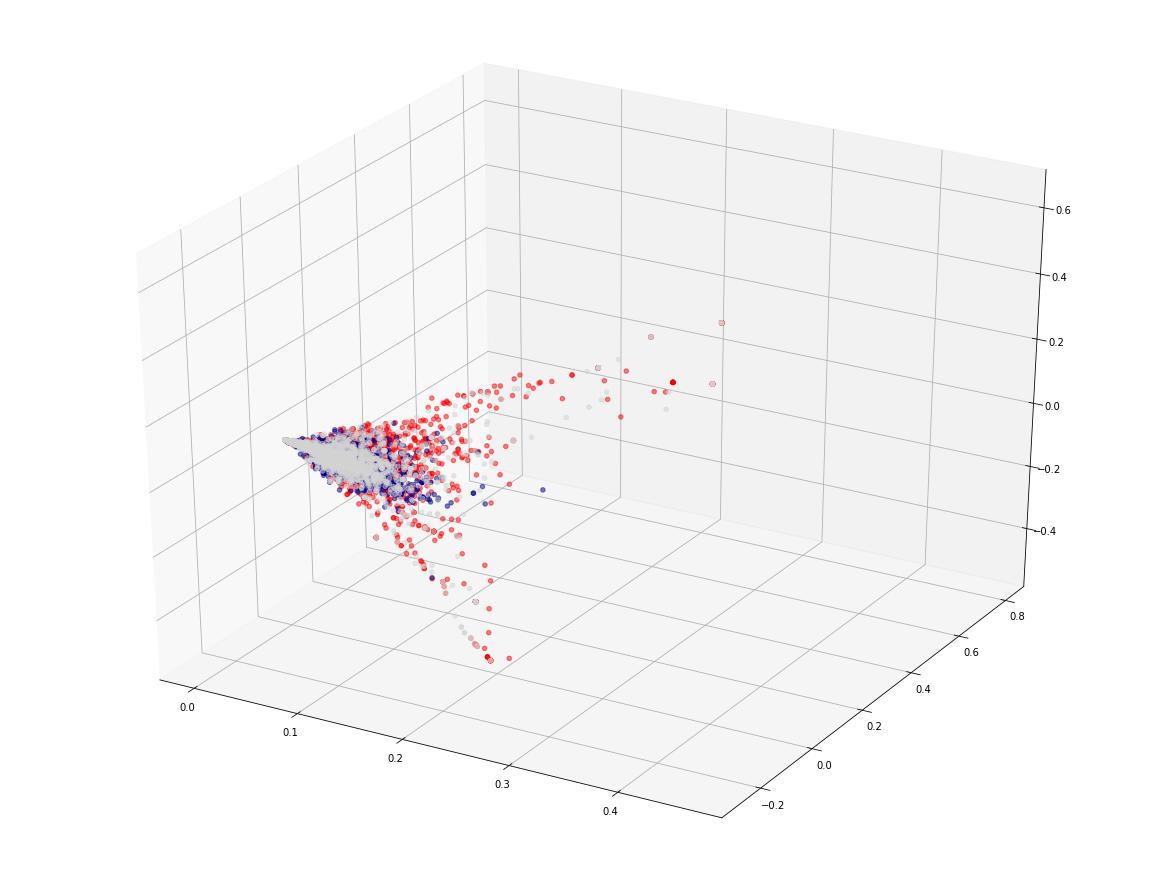

In [137]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)

colormap = ['darkblue', 'red', 'lightgrey']
color = list(map(lambda x: colormap[x], dataset['target']))

scatter = ax.scatter(
    svd[:, 0],
    svd[:, 1],
    svd[:, 2],
    c=color,
    alpha=0.5
)

plt.show()

#### 2.2.2 Visualization with 2D after T-SNE <a id="2.2.2"></a>
[back to table of contents](#toc)

In [139]:
from sklearn.manifold import TSNE

In [140]:
def tsne(matrix):
    decomposer = TSNE(n_components=2, n_jobs=-1)
    tsne = decomposer.fit_transform(matrix)
    return decomposer, tsne

In [141]:
_, tsne = tsne(svd)
tsne.shape

(10876, 2)

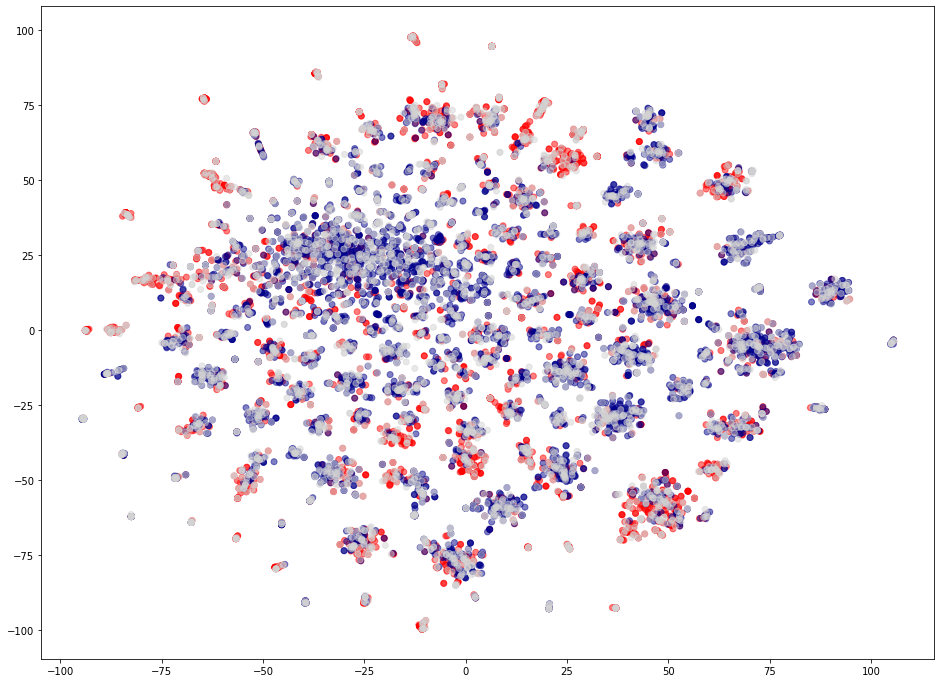

In [147]:
fig = plt.figure(figsize=(16, 12))
colormap = ['darkblue', 'red', 'lightgrey']
color = list(map(lambda x: colormap[x], dataset['target']))
plt.scatter(tsne[:, 0], tsne[:, 1], c=color, alpha=0.5)
plt.show()

### 2.3 Doc2Vec Vectorization <a id="2.3"></a>
[back to table of contents](#toc)

**import library: gensim**

In [150]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [151]:
def doc2vec(corpus):
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
    model = Doc2Vec(documents, vector_size=10, min_count=5, workers=5)
    return model

In [ ]:
''' 
Time Consuming Work, not done in locally
'''

# model = doc2vec(corpus)

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


## 3. Classifier Modeling <a id="3"></a>
[back to table of contents](#toc)

**load cleaned dataset**

In [136]:
dataset = pd.read_csv('./data/datset_cleaned', encoding='utf-8')
dataset

index     id keyword location  \
0          0      1     NaN      NaN   
1          1      4     NaN      NaN   
2          2      5     NaN      NaN   
3          3      6     NaN      NaN   
4          4      7     NaN      NaN   
...      ...    ...     ...      ...   
10871   3258  10861     NaN      NaN   
10872   3259  10865     NaN      NaN   
10873   3260  10868     NaN      NaN   
10874   3261  10874     NaN      NaN   
10875   3262  10875     NaN      NaN   

                                                    text  target  \
0      Our Deeds are the Reason of this #earthquake M...       1   
1                 Forest fire near La Ronge Sask. Canada       1   
2      All residents asked to 'shelter in place' are ...       1   
3      13,000 people receive #wildfires evacuation or...       1   
4      Just got sent this photo from Ruby #Alaska as ...       1   
...                                                  ...     ...   
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...      -1   
10872  Storm in RI worse than last hurricane. My city...      -1   
10873  Green Line derailment in Chicago http://t.co/U...      -1   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...      -1   
10875  #CityofCalgary has activated its Municipal Eme...      -1   

                                            text_cleaned  \
0           deeds reason earthquake may allah forgive us   
1                  forest fire near la ronge sask canada   
2      residents asked shelter place notified officer...   
3      people receive wildfires evacuation orders cal...   
4      got sent photo ruby alaska smoke wildfires pou...   
...                                                  ...   
10871  earthquake safety los angeles safety fasteners...   
10872  storm ri worse last hurricane cityampothers ha...   
10873                      green line derailment chicago   
10874           meg issues hazardous weather outlook hwo   
10875  cityofcalgary activated municipal emergency pl...   

                                            text_stemmed  \
0              deed reason earthquak may allah forgiv us   
1                   forest fire near la rong sask canada   
2      resid ask shelter place notifi offic evacu she...   
3            peopl receiv wildfir evacu order california   
4      got sent photo rubi alaska smoke wildfir pour ...   
...                                                  ...   
10871       earthquak safeti lo angel safeti fasten xrwn   
10872  storm ri wors last hurrican cityampoth hardest...   
10873                          green line derail chicago   
10874                meg issu hazard weather outlook hwo   
10875    cityofcalgari activ municip emerg plan yycstorm   

                                         text_lemmatized  \
0             deed reason earthquake may allah forgive u   
1                  forest fire near la ronge sask canada   
2      resident asked shelter place notified officer ...   
3      people receive wildfire evacuation order calif...   
4      got sent photo ruby alaska smoke wildfire pour...   
...                                                  ...   
10871  earthquake safety los angeles safety fastener ...   
10872  storm ri worse last hurricane cityampothers ha...   
10873                      green line derailment chicago   
10874            meg issue hazardous weather outlook hwo   
10875  cityofcalgary activated municipal emergency pl...   

                                                   token  
0      ['deed', 'reason', 'earthquake', 'may', 'allah...  
1      ['forest', 'fire', 'near', 'la', 'ronge', 'sas...  
2      ['resident', 'asked', 'shelter', 'place', 'not...  
3      ['people', 'receive', 'wildfire', 'evacuation'...  
4      ['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...  
...                                                  ...  
10871  ['earthquake', 'safety', 'los', 'angeles', 'sa...  
10872  ['storm', 'ri', 'worse', 'last', 'hurricane', ...  
10873         [

### 3.1 Prepare Train and Test Data <a id="3.1"></a>
[back to table of contents](#toc)

**split train and test**

In [137]:
test = dataset[dataset['target'] == -1]
train = dataset[dataset['target'] != -1]

In [138]:
train.shape

(7613, 10)

In [139]:
test.shape

(3263, 10)

**shuffle train data**

In [140]:
sample_size = len(train)
train = train.sample(sample_size).reset_index()
train

level_0  index     id      keyword                      location  \
0        6781   6042   8637      seismic                            UK   
1        7059   6541   9360     survived                           NaN   
2        3516    401    578        arson  North-East Region, Singapore   
3        2069   4897   6972     massacre                           NaN   
4         287    836   1214     blizzard              The ?? below ???   
...       ...    ...    ...          ...                           ...   
7608     2526   6030   8620      seismic                        ??????   
7609     1794   4292   6097     hellfire                           NaN   
7610     5886   4535   6449      injured                           NaN   
7611     3252   7594  10849          NaN                           NaN   
7612     6486   5522   7877  quarantined                  Dunwoody, GA   

                                                   text  target  \
0     ENGLAND EAST COAST. Dogger Bank Westward. 1. S...       0   
1     Not even the Berlin wall survived the 80's I d...       0   
2                               @sayn_ae angel or arson       0   
3     The Fake of Nanking Massacre-4 Eyewitnesses (E...       1   
4     @BubblyCuteOne ?????????? ok ok okayyyyyy Ima ...       1   
...                                                 ...     ...   
7608  [Report 5] 18:22:45 Ibaraki Prefecture offing ...       1   
7609  The Prophet (peace be upon him) said 'Save you...       1   
7610  Arian Foster does keep his promise... And that...       0   
7611  A gas thing just exploded and I heard screams ...       1   
7612  okay the cat has been quarantined in my bathro...       0   

                                           text_cleaned  \
0     england east coast dogger bank westward seismi...   
1     even berlin wall survived daubt ever generatio...   
2                                    saynae angel arson   
3     fake nanking massacre eyewitnesses english oba...   
4     bubblycuteone ok ok okayyyyyy ima act right bo...   
...                                                 ...   
7608  report ibaraki prefecture offing depth km maxi...   
7609  prophet peace upon said save hellfire even giv...   
7610   arian foster keep promise get injured every yeat   
7611  gas thing exploded heard screams whole street ...   
7612  okay cat quarantined bathroomits meowing reall...   

                                           text_stemmed  \
0     england east coast dogger bank westward seismi...   
1     even berlin wall surviv daubt ever gener like ...   
2                                     sayna angel arson   
3     fake nank massacr eyewit english obama clinton...   
4     bubblycuteon ok ok okayyyyyi ima act right bou...   
...                                                 ...   
7608  report ibaraki prefectur of depth km maximum s...   
7609  prophet peac upon said save hellfir even give ...   
7610      arian foster keep promis get injur everi yeat   
7611  ga thing explod heard scream whole street smel...   
7612  okay cat quarantin bathroomit meow realli loud...   

                                        text_lemmatized  \
0     england east coast dogger bank westward seismi...   
1     even berlin wall survived daubt ever generatio...   
2                                    saynae angel arson   
3     fake nanking massacre eyewitness english obama...   
4     bubblycuteone ok ok okayyyyyy ima act right bo...   
...                                                 ...   
7608  report ibaraki prefecture offing depth km maxi...   
7609  prophet peace upon said save hellfire even giv...   
7610   arian foster keep promise get injured every yeat   
7611  gas thing exploded heard scream whole street s...   
7612  okay cat quarantined bathroomits meowing reall...   

                                                  token  
0     ['england', 'east', 'coast', 'dogger', 'bank',...  
1     ['even', 'berlin', 'wall', 'survived', 'daubt'...  
2          

**extract only data in training and test(token and target)**

In [141]:
x_train = list(train['text_lemmatized'])
y_train = list(train['target'])
x_test = list(train['text_lemmatized'])

**make word dictionary**

In [142]:
words = set()
for sentence in (x_train + x_test):
    for word in sentence.split():
        words.add(word)
words = ['<pad>'] + list(sorted(words))

In [143]:
word2idx = {word: idx for idx, word in enumerate(words)}
idx2word = {idx: word for idx, word in enumerate(words)}

print(word2idx)

{'<pad>': 0, 'aa': 1, 'aaaa': 2, 'aaaaaaallll': 3, 'aaaaaand': 4, 'aaarrrgghhh': 5, 'aaceorg': 6, 'aal': 7, 'aampb': 8, 'aampw': 9, 'aan': 10, 'aannnnd': 11, 'aar': 12, 'aaronthefm': 13, 'aashiqui': 14, 'ab': 15, 'aba': 16, 'abandon': 17, 'abandoned': 18, 'abandonedpics': 19, 'abandoning': 20, 'abbandoned': 21, 'abbott': 22, 'abbruchsimulator': 23, 'abbswinston': 24, 'abbyairshow': 25, 'abc': 26, 'abcchicago': 27, 'abceyewitness': 28, 'abcnews': 29, 'abcnorio': 30, 'abe': 31, 'aberdeen': 32, 'aberdeenfanpage': 33, 'aberdeenfc': 34, 'aberystwythshrewsbury': 35, 'abes': 36, 'abha': 37, 'abia': 38, 'ability': 39, 'abject': 40, 'ablaze': 41, 'able': 42, 'ableg': 43, 'abninfvet': 44, 'aboard': 45, 'abomb': 46, 'abombed': 47, 'abomination': 48, 'abortion': 49, 'abouts': 50, 'abrancaballero': 51, 'absence': 52, 'absolute': 53, 'absolutely': 54, 'absolutsumya': 55, 'abstorm': 56, 'abstract': 57, 'absurd': 58, 'absurdly': 59, 'abubaraa': 60, 'abuse': 61, 'abused': 62, 'abuseddesolateamplost': 6

**word to index**

In [144]:
x_train = list(map(lambda x: [word2idx[word] for word in x.split()], x_train))
x_test = list(map(lambda x: [word2idx[word] for word in x.split()], x_test))

In [145]:
x_train_length = list(map(lambda x: len(x), x_train))
x_test_length = list(map(lambda x: len(x), x_test))
maxlen = max(max(x_train_length), max(x_test_length))
maxlen

23

In [146]:
import tensorflow.keras as keras

In [147]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=25, padding='post', truncating='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=25, padding='post', truncating='post')

In [148]:
x_train.shape

(7613, 25)

### 3.2 Modeling <a id="3.2"></a>
[back to table of contents](#toc)

In [212]:
class TweetModel(keras.Model):
    def __init__(self, vocab_size, embedding_dim, sequence_length):
        
        super(TweetModel, self).__init__()
        
        self.embedding = keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequence_length)
        
        self.lstm1 = keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True))
        self.drop1 = keras.layers.TimeDistributed(keras.layers.Dropout(0.5))
        
        self.dense2 = keras.layers.Dense(256)
        self.norm2 = keras.layers.BatchNormalization()
        self.relu2 = keras.layers.Activation(keras.activations.relu)
        self.drop2 = keras.layers.Dropout(0.5)

        self.dense3 = keras.layers.Dense(64, activation='relu')
        self.norm3 = keras.layers.BatchNormalization()
        self.relu3 = keras.layers.Activation(keras.activations.relu)
        self.drop3 = keras.layers.Dropout(0.5)
        
        self.dense4 = keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs, training=False):
        inputs = self.embedding(inputs)
        
        layer1 = self.lstm1(inputs)
        layer1 = self.drop1(layer1)
        
        layer2 = self.dense2(layer1)
        layer2 = self.norm2(layer2)
        layer2 = self.relu2(layer2)
        layer2 = self.drop2(layer2)

        layer3 = self.dense3(layer2)
        layer3 = self.norm3(layer3)
        layer3 = self.relu3(layer3)
        layer3 = self.drop3(layer3)

        outputs = self.dense4(layer3)
        
        return outputs

In [213]:
vocab_size = len(words)
embedding_dim = 1000
sequence_length = 25

model = TweetModel(vocab_size, embedding_dim, sequence_length)
temp = keras.Input(shape=(25, ))
print(temp)
model(temp)
model.summary()

Tensor("input_32:0", shape=(None, 25), dtype=float32)
Model: "tweet_model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 25, 1000)          15398000  
_________________________________________________________________
bidirectional_59 (Bidirectio (None, 25, 2048)          16588800  
_________________________________________________________________
time_distributed_51 (TimeDis (None, 25, 2048)          0         
_________________________________________________________________
dense_68 (Dense)             (None, 25, 256)           524544    
_________________________________________________________________
batch_normalization_11 (Batc (None, 25, 256)           1024      
_________________________________________________________________
activation_11 (Activation)   (None, 25, 256)           0         
________________________________________________________________

In [214]:
import tensorflow as tf

In [215]:
def loss_fn(model, features, labels, training=True):
    outputs = model(features, training)
    labels = tf.cast(labels, tf.float32)
    loss = -tf.reduce_mean(tf.math.log(outputs) * labels + tf.math.log(1 - outputs) * (1 - labels))
    return loss

In [216]:
def accuracy_fn(model, features, labels, training=False):
    outputs = model(features, training)
    prediction = tf.cast(outputs > 0.5, tf.int32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, labels), tf.float32))
    return accuracy

In [217]:
learning_rate = 0.001
epochs = 15
batch_size = 128
iterations = len(x_train) // batch_size

In [218]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(10000)
train_dataset = train_dataset.prefetch(10000)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()

iterator = iter(train_dataset)

In [219]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(learning_rate, 10, 0.8)
optimizer = keras.optimizers.Adam(lr_decay)

In [220]:
for epoch in range(epochs):
    epoch_loss = 0.
    epoch_acc = 0.

    for iteration in range(iterations):

        train_features, train_labels = iterator.get_next()

        with tf.GradientTape() as tape:
            loss = loss_fn(model, train_features, train_labels, True)
        grads = tape.gradient(loss, model.trainable_variables)        
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss += loss
        
        acc = accuracy_fn(model, train_features, train_labels, False)
        epoch_acc += acc
        
        print('Epoch {} [{}/{}] loss={:7.4f} acc={:.2%}'.format(epoch + 1, iteration + 1, iterations, loss, acc))
        
    epoch_loss /= iterations
    epoch_acc /= iterations
    
       
    print('Epoch {} loss={:7.4f} acc={:.2%}'.format(epoch + 1, epoch_loss, epoch_acc))
     

Epoch 1 [1/59] loss= 0.9397 acc=49.07%
Epoch 1 [2/59] loss= 1.0708 acc=48.00%
Epoch 1 [3/59] loss= 0.9287 acc=54.81%
Epoch 1 [4/59] loss= 0.8576 acc=60.94%
Epoch 1 [5/59] loss= 0.8750 acc=54.69%
Epoch 1 [6/59] loss= 0.8685 acc=54.69%
Epoch 1 [7/59] loss= 0.8735 acc=53.91%
Epoch 1 [8/59] loss= 0.8530 acc=57.03%
Epoch 1 [9/59] loss= 0.8469 acc=59.38%
Epoch 1 [10/59] loss= 0.8539 acc=53.91%
Epoch 1 [11/59] loss= 0.8647 acc=52.34%
Epoch 1 [12/59] loss= 0.8586 acc=53.12%
Epoch 1 [13/59] loss= 0.8591 acc=52.25%
Epoch 1 [14/59] loss= 0.8451 acc=55.09%
Epoch 1 [15/59] loss= 0.8346 acc=57.77%
Epoch 1 [16/59] loss= 0.8261 acc=58.06%
Epoch 1 [17/59] loss= 0.8322 acc=55.62%
Epoch 1 [18/59] loss= 0.8538 acc=49.05%
Epoch 1 [19/59] loss= 0.8243 acc=54.23%
Epoch 1 [20/59] loss= 0.8312 acc=51.99%
Epoch 1 [21/59] loss= 0.8519 acc=48.69%
Epoch 1 [22/59] loss= 0.8296 acc=51.54%
Epoch 1 [23/59] loss= 0.8073 acc=55.68%
Epoch 1 [24/59] loss= 0.8280 acc=52.95%
Epoch 1 [25/59] loss= 0.8088 acc=55.57%
Epoch 1 [

Epoch 4 [28/59] loss= 0.7729 acc=59.38%
Epoch 4 [29/59] loss= 0.7634 acc=61.72%
Epoch 4 [30/59] loss= 0.7820 acc=56.25%
Epoch 4 [31/59] loss= 0.7759 acc=57.01%
Epoch 4 [32/59] loss= 0.7987 acc=48.44%
Epoch 4 [33/59] loss= 0.7665 acc=60.14%
Epoch 4 [34/59] loss= 0.7746 acc=55.47%
Epoch 4 [35/59] loss= 0.7728 acc=59.37%
Epoch 4 [36/59] loss= 0.7862 acc=52.34%
Epoch 4 [37/59] loss= 0.7853 acc=53.91%
Epoch 4 [38/59] loss= 0.7928 acc=52.34%
Epoch 4 [39/59] loss= 0.7734 acc=57.81%
Epoch 4 [40/59] loss= 0.7762 acc=56.23%
Epoch 4 [41/59] loss= 0.7902 acc=53.90%
Epoch 4 [42/59] loss= 0.7668 acc=59.36%
Epoch 4 [43/59] loss= 0.7785 acc=56.23%
Epoch 4 [44/59] loss= 0.7695 acc=59.36%
Epoch 4 [45/59] loss= 0.7771 acc=57.80%
Epoch 4 [46/59] loss= 0.7799 acc=56.23%
Epoch 4 [47/59] loss= 0.7742 acc=57.78%
Epoch 4 [48/59] loss= 0.7625 acc=60.13%
Epoch 4 [49/59] loss= 0.7810 acc=57.79%
Epoch 4 [50/59] loss= 0.7708 acc=60.12%
Epoch 4 [51/59] loss= 0.7796 acc=55.44%
Epoch 4 [52/59] loss= 0.7845 acc=52.33%


KeyboardInterrupt: 

In [223]:
outputs = model.predict(x_train)
prediction = tf.cast(outputs > 0.5, tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_train), tf.float32))
print('Accuracy {:.2%}'.format(accuracy.numpy()))

Accuracy 56.49%
